# Welcome to the Argentina Real Estate Python Case Study!

 ***Argentina Real Estate Associates (AREA)*** would like to know which market segments are undervalued; including profitable provinces, cities and housing types.  
 
 Specifically, properties with the following parameters will be used to narrow down prospective options:
 
 * ***2-6 bedrooms***, no hotels
 
 * no rental, lots or commercial properties
 
 * under $1M USD
 
 * under 10000 m^2 surface area
 
 
 Segments that present investment opportunities will drive future profits. 
 
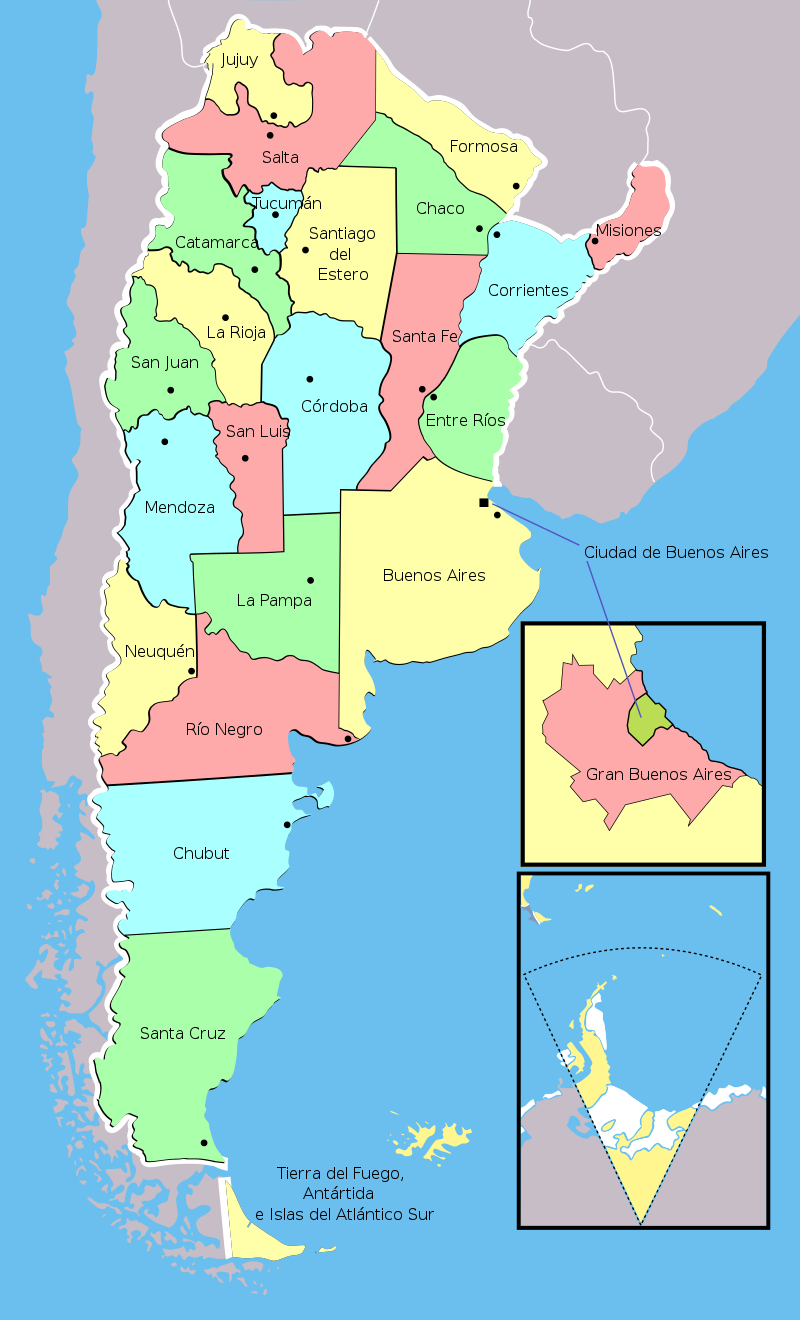

## <span style="color:blue">***Data Cleansing***</span>

###  <span style="color:green">Import Libraries</span> 

* **Matplotlib** - This is Python's basic plotting library.
  * Include **'%matplotlib inline'** so graphs are easily included inline

* **numpy** - Linear algebra functions

* **Seaborn** - Create better plots, built upon matplotlib

* **Pandas** - View and manipulate data in a DataFrame

* **statsmodels.api** - Create statistical models

* **tkinter** - create popup dialog for file saving

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import Python packages
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import matplotlib.dates as md
%matplotlib inline             
mpl.rcParams['figure.figsize'] = (20,15)
import seaborn as sns  # nicer plotting format
import os              # accessing directory structure
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv), DataFrame capability
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # set up number formatting
import numpy as np     # linear algebra
import datetime as datetime
import statsmodels.api as sm   # linear regression
import tkinter as tk    # used to export csv file at finish
from tkinter import filedialog



###  <span style="color:green">Data Read</span> 
* The raw data from Kaggle is contained in one [**file**](https://www.kaggle.com/rmjacobsen/property-listings-for-5-south-american-countries)

* The file, **"ar_prop_edited2.csv"**, contains all the 'raw data' required for analysis.

* Import data file and convert to a DataFrame using pandas library.

* Print initial descriptive statistics for the dataframe using **.describe()** and **.info()**

In [2]:
df1 = pd.read_csv('ar_prop_edited2.csv', delimiter=',', low_memory = False)  # create raw data dataframe from CSV file
nRow, nCol = df1.shape                                                       # store dataframe dimensions in variables
print(f'The RAW file contains {nRow} rows and {nCol} columns')               # Check raw dataframe dimensions

The RAW file contains 979941 rows and 17 columns


In [3]:
# Column Header names in the DataFrame.
df1.columns 

Index(['start_date', 'end_date', 'lat', 'lon', 'Country', 'Province', 'City',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'price_period', 'property_type', 'operation_type'],
      dtype='object')

###  <span style="color:green">    Column Descriptions</span> 

* start_date - Date of registration of the listing
* end_date - Cancellation date of the listing
* lat - Latitude of the property
* lon - Longitude of the property
* country of the property
* province of the property
* city of the property
* operation_type - Type of listing:
  * Sale
  * Rental
* property_type - Type of property:
  * House
  * Apartment
  * PH (Horizontal Property)
  * etc
* rooms - Total number of rooms 
* bedrooms - Number of bedrooms 
* bathrooms - Number of bathrooms
* surface_total - Total area in m²
* surface_covered - Area covered in m²
* price - Price published in the listing
* currency - Currency of published price
* price_period - Payment periods:
  * Daily
  * Weekly
  * Monthly

In [4]:
# raw data info and column data type(s).
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979941 entries, 0 to 979940
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       979941 non-null  object 
 1   end_date         979941 non-null  object 
 2   lat              831455 non-null  float64
 3   lon              830158 non-null  float64
 4   Country          979941 non-null  object 
 5   Province         979941 non-null  object 
 6   City             928528 non-null  object 
 7   rooms            497917 non-null  float64
 8   bedrooms         370030 non-null  float64
 9   bathrooms        761995 non-null  float64
 10  surface_total    466240 non-null  float64
 11  surface_covered  440563 non-null  float64
 12  price            933689 non-null  float64
 13  currency         930785 non-null  object 
 14  price_period     370516 non-null  object 
 15  property_type    979941 non-null  object 
 16  operation_type   979941 non-null  obje

In [5]:
# get an idea if 'Province' column is correctly populated with only province data
prov_col_values = df1['Province'].values.ravel()
unique_prov_col_values = pd.unique(prov_col_values)

print(unique_prov_col_values)


['San Juan' 'San Luis' 'Misiones' 'Salta' 'Chubut' 'Mendoza' 'Cordoba'
 'Neuquen' 'Santa Fe' 'Tucuman' 'Rio Negro' 'Capital Federal'
 'Buenos Aires Interior' 'Entre Rios' 'Chaco' 'Corrientes'
 'Santiago Del Estero' 'La Pampa' 'Tierra Del Fuego' 'Jujuy' 'La Rioja'
 'Catamarca' 'Santa Cruz' 'Formosa']


In [6]:
# Top 3 rows from DataFrame, check if NaN values exist.
df1.head(3) 

,start_date,end_date,lat,lon,Country,Province,City,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
0,11/18/2019,12/20/2019,-31.53,-68.36,Argentina,San Juan,NaN,nan,nan,nan,70000.00,1.00,1490000.00,ARS,NaN,Other,Sale
1,11/18/2019,12/31/9999,-32.41,-64.99,Argentina,San Luis,Carpintería,2.00,2.00,1.00,nan,nan,nan,NaN,Monthly,Other,Rental Temporary
2,11/18/2019,2/7/2020,-27.37,-55.90,Argentina,Misiones,Posadas,3.00,2.00,2.00,127.00,127.00,25000.00,ARS,NaN,Apartment,Rental


In [7]:
# fill NaN with 0, otherwise Descriptive Statistics will be incorrect
df1 = df1.fillna(0)
df1.head(3)      # check to see if NaN are being filled with zeros

,start_date,end_date,lat,lon,Country,Province,City,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
0,11/18/2019,12/20/2019,-31.53,-68.36,Argentina,San Juan,0,0.00,0.00,0.00,70000.00,1.00,1490000.00,ARS,0,Other,Sale
1,11/18/2019,12/31/9999,-32.41,-64.99,Argentina,San Luis,Carpintería,2.00,2.00,1.00,0.00,0.00,0.00,0,Monthly,Other,Rental Temporary
2,11/18/2019,2/7/2020,-27.37,-55.90,Argentina,Misiones,Posadas,3.00,2.00,2.00,127.00,127.00,25000.00,ARS,0,Apartment,Rental


###  <span style="color:green">Start to clean data set with Python. 
Looking at the raw data, certain column types are populated with incorrect data.  For example, zero price, zero area and zero room information.    
    
* Remove zero priced properties</span> 

In [8]:
# find rows with price != 0
is_not_zero = df1['price'] != 0

# remove rows with price == 0, as properties without a price are useless in analysis.
df1_no_zeros = df1[is_not_zero]
df1_no_zeros.shape

(930784, 17)

### <span style="color:green">  Apply the filters below to remove incorrectly populated rows and convert currency: </span> 
* incorrect latitude & longitude rows
* rows without any surface_total values
* properties with no total rooms
* properties with no bedrooms
* rows with City name == "0"
* all rental properties
* properties over $1M USD
* properties listed as "Other", "Office", "Field Home", "Deposit", "Garage", "Lot" & "Local Commercial"
* properties with more than 6 bedrooms
* remove columns that aren't needed

* Convert Argentine pesos to US dollars and divide surface_total by USD price.  The currency conversion as of 10/12/2020 is:  1 USD to ARS = 81.4861 Argentine Pesos



In [9]:
# filter out incorrect lat properties
max_lat = df1_no_zeros['lat'] < -21.000000  # latitudes greater than 21 degrees South passed
df1_max_lat = df1_no_zeros[max_lat]

# filter out incorrect long properties
min_long = df1_max_lat['lon'] < -56.000000  # longitudes greater than 56 degrees West passed
df1_min_long = df1_max_lat[min_long]

# filter out properties without any surface_total information
have_area = df1_min_long['surface_total'] > 0
df1_have_area = df1_min_long[have_area]

# filter out properties without any total room information
have_rooms = df1_have_area['rooms'] > 0
df1_have_rooms = df1_have_area[have_rooms]

# filter out properties without bedroom information as we need number of bedrooms for analysis later.
have_bedrooms = df1_have_rooms['bedrooms'] > 0
df2 = df1_have_rooms[have_bedrooms]

# convert Argentine pesos to US dollars.   81.4861 ARS = $1 USD on 10/12/2020
df2['old_price'] = df2['price']  # keep original price value as new column
df2['usd_price'] = np.where(df2['currency'] == 'ARS', round((df2['price'] / 81.4861), 2), df2['price'])
df2['price'] = df2['usd_price']  # stuff price column with all USD referenced values
df2['currency'] = 'USD'     # label all currency as $USD
del df2['usd_price']        # remove this column to avoid confusion later
del df2['price_period']     # remove this column to avoid confusion later

# remove properties over $1M USD
under_one_mil = df2['price'] <= 1000000
df2_no_mil = df2[under_one_mil]

# remove Garage properties
no_garage = df2_no_mil['property_type'] != 'Cochera'
df2_no_garage = df2_no_mil[no_garage]

# remove Lot properties
no_lot = df2_no_garage['property_type'] != 'Lot'
df2_no_lot = df2_no_garage[no_lot]

# remove Other properties
no_other = df2_no_lot['property_type'] != 'Other'
df2_no_other = df2_no_lot[no_other]

# remove Office properties
no_office = df2_no_other['property_type'] != 'Office'
df2_no_office = df2_no_other[no_office]

# remove Field Home properties
no_field = df2_no_office['property_type'] != 'Field Home'
df2_no_field = df2_no_office[no_field]

# remove Local Commercial properties
no_loc = df2_no_field['property_type'] != 'Local Commercial'
df2_no_loc = df2_no_field[no_loc]

# remove Deposit properties
no_dep = df2_no_loc['property_type'] != 'Deposit'
df2_no_dep = df2_no_loc[no_dep]
                             
# remove listings with City name == "0"
city_not_zero = df2_no_dep['City'] != 0
df3 = df2_no_dep[city_not_zero]

# remove listings with surface_total == 0
surface_not_zero = df3['surface_total'] != 0
df3_surface_not_zero = df3[surface_not_zero]

# remove properties with large surface_totals (larger than 5000 m^2)
surface_not_big = df3_surface_not_zero['surface_total'] <= 5000
df3_surface_not_big = df3_surface_not_zero[surface_not_big]

# filter out properties with more than 6 bedrooms as we aren't interested in hotel properties.
less_than_six_bedrooms = df3_surface_not_big['bedrooms'] <= 6
df3_less_than_six = df3_surface_not_big[less_than_six_bedrooms]

# remove listings with Rental = True, only interested in Sale properties
no_rentals = df3_less_than_six['operation_type'] != 'Rental'
df4_no_rental = df3_less_than_six[no_rentals]

no_other2 = df4_no_rental['property_type'] != 'Other'
df4_no_other2 = df4_no_rental[no_other2]

# remove listings with Rental Temporary = True, only interested in Sale properties
no_rentals_temp = df4_no_other2['operation_type'] != 'Rental Temporary'
df4 = df4_no_other2[no_rentals_temp]
del df4['operation_type']           # remove this column to avoid confusion later
del df4['old_price']                # remove this column to avoid confusion later
del df4['surface_covered']          # remove this column to avoid confusion later

# calculate price ($USD) per square area 
#df4['area_price'] = df4['surface_total'] / df4['price']
df4['price_area'] = df4['price'] / df4['surface_total']

no_big_pricearea = df4['price_area'] <= 10000   # no large price/area properties
df5 = df4[no_big_pricearea]

df5.shape              # print out dataframe dimensions as QC

(116909, 15)

In [10]:
df5.head(3)  # check columns

,start_date,end_date,lat,lon,Country,Province,City,rooms,bedrooms,bathrooms,surface_total,price,currency,property_type,price_area
3,11/18/2019,6/27/2020,-24.83,-65.39,Argentina,Salta,Salta,4.00,3.00,1.00,200.00,22703.26,USD,Home,113.52
5,11/18/2019,3/25/2020,-24.77,-65.42,Argentina,Salta,Salta,4.00,3.00,1.00,58.00,42952.11,USD,Apartment,740.55
28,11/18/2019,12/20/2019,-31.15,-64.33,Argentina,Cordoba,Río Ceballos,6.00,2.00,2.00,554.00,58000.00,USD,Home,104.69


### <span style="color:green">  Now we need to visualize the raw data: </span> 

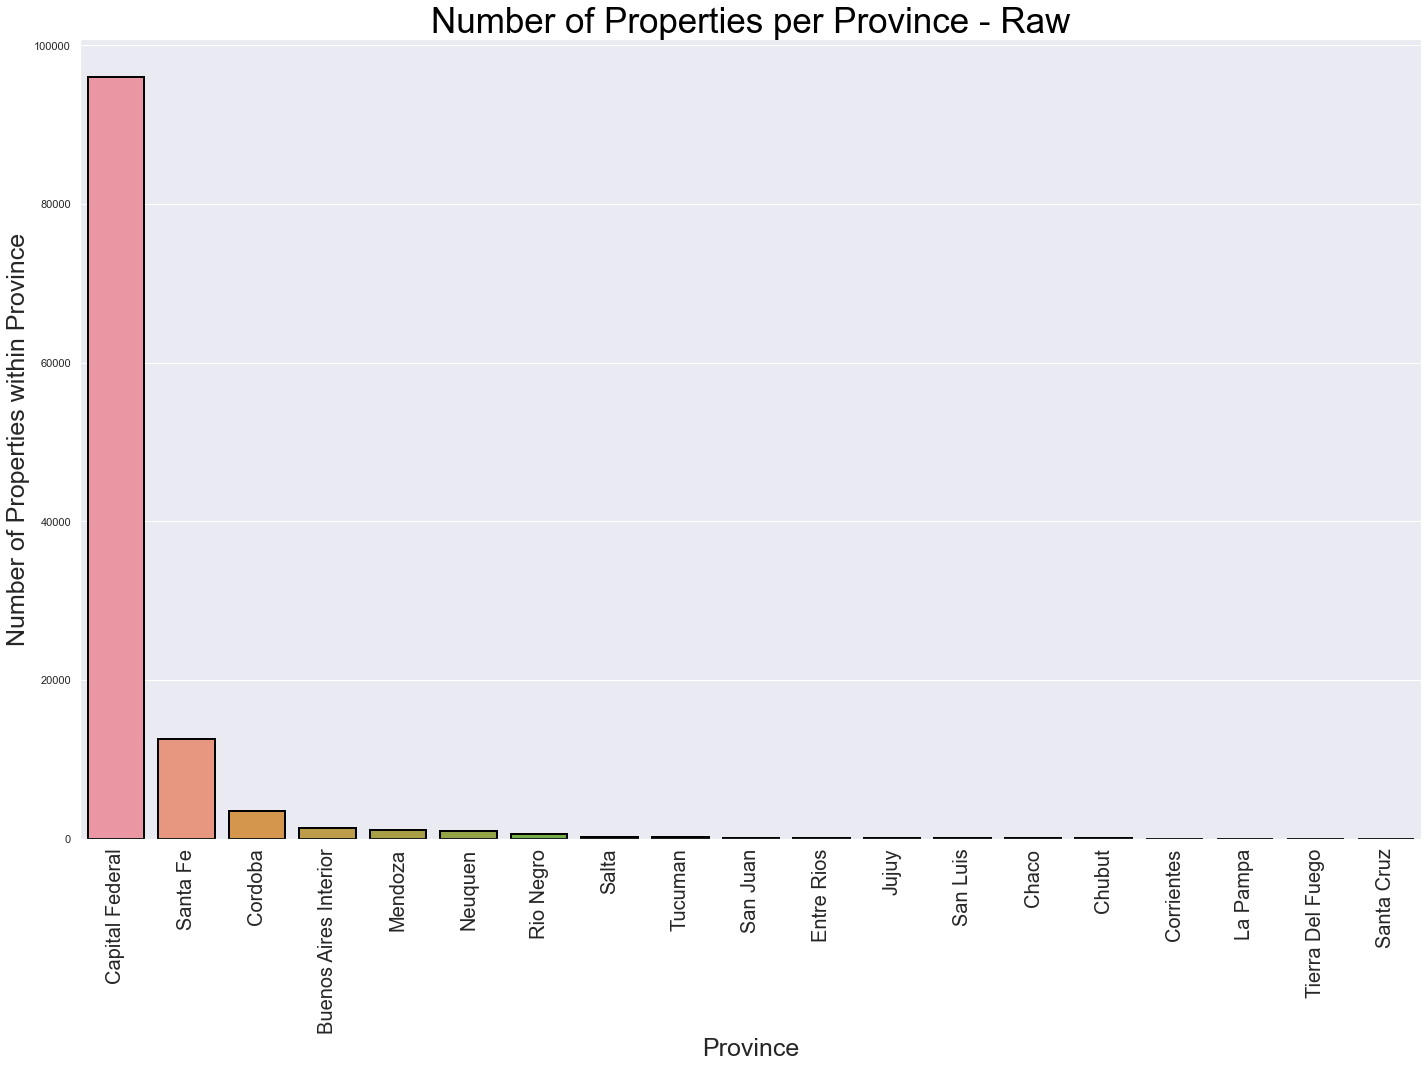

In [11]:
# plot number of properties per province - raw
sns.set(style='darkgrid')
plt.figure(figsize = (20, 15))
sns.countplot(x= 'Province', data = df5, edgecolor = 'black', linewidth = 2, order = df5['Province'].value_counts().index)  #sort highest to lowest
plt.ylabel('Number of Properties within Province', fontsize = 25)
plt.xlabel('Province', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.title('Number of Properties per Province - Raw', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()

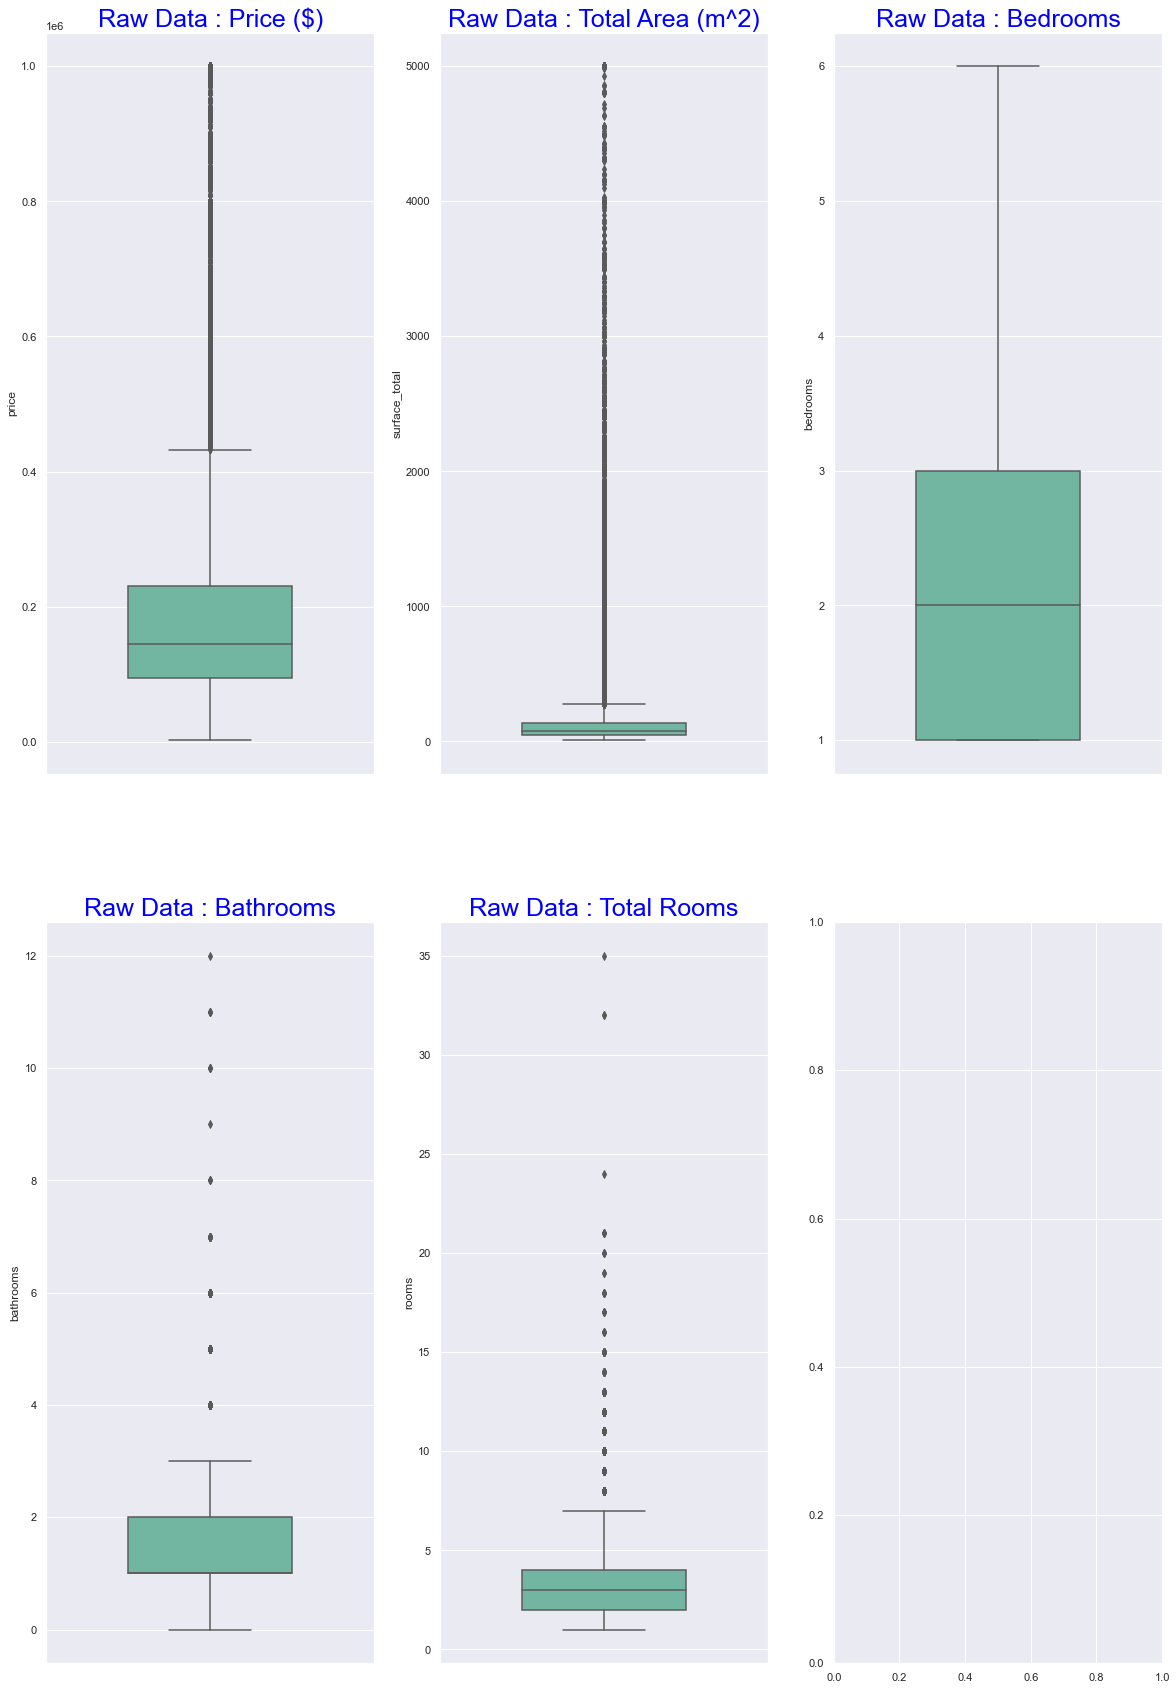

In [12]:
# use entire window width for plotting purposes
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Initial Raw Data Analysis
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

fig, axs = plt.subplots(2,3, figsize = (20,30))
plt1 = sns.boxplot(df5['price'], ax = axs[0,0], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Price ($)',fontsize=25, color='blue')
plt2 = sns.boxplot(df5['surface_total'], ax = axs[0,1], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Total Area (m^2)',fontsize=25, color='blue')
plt3 = sns.boxplot(df5['bedrooms'], ax = axs[0,2], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Bedrooms',fontsize=25, color='blue')
plt1 = sns.boxplot(df5['bathrooms'], ax = axs[1,0], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Bathrooms',fontsize=25, color='blue')
plt2 = sns.boxplot(df5['rooms'], ax = axs[1,1], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Total Rooms',fontsize=25, color='blue')
#plt3 = sns.boxplot(df5['price_area'], ax = axs[1,2], orient = 'v', palette = 'Set2', width = 0.5).set_title('Raw Data : Price / Area ($/m^2)',fontsize=25, color='blue')

#plt.tight_layout()

### <span style="color:green"> Here we get a count of 1, 2, and 3+ bedroom properties: </span> 

In [13]:
# one bedroom properties only
one_br = df5[(df5.bedrooms == 1)]
one_br_count = one_br.shape[0]

# two bedroom properties only
two_br = df5[(df5.bedrooms == 2)]
two_br_count = two_br.shape[0]

# three plus bedroom properties only
three_br = df5[(df5.bedrooms >= 3)]
three_br_count = three_br.shape[0]


print('The number of one bedroom properties is: ' + str(one_br_count))

print('The number of two bedroom properties is: ' + str(two_br_count))

print('The number of three + bedroom properties is: ' + str(three_br_count))

The number of one bedroom properties is: 43832
The number of two bedroom properties is: 38710
The number of three + bedroom properties is: 34367


### <span style="color:green">  Descriptive Statistics for the filtered data </span> 

In [14]:
nRow2, nCol2 = df5.shape  # store dataframe dimensions in variables
print(f'The FILTERED file contains {nRow2} rows and {nCol2} columns')  # Check filtered dataframe dimensions

The FILTERED file contains 116909 rows and 15 columns


### <span style="color:blue">***Data Insights***</span>

In [15]:
# Define functions to use later

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot', fontsize )
    plt.show()
    
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
        
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()    # calculate correlation matrix here
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    sns.heatmap(corr, cmap = 'RdBu_r', square = True, annot = True, robust = True, linewidths = 0.5)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(rotation = 0, fontsize = 15)
    plt.show()    
    

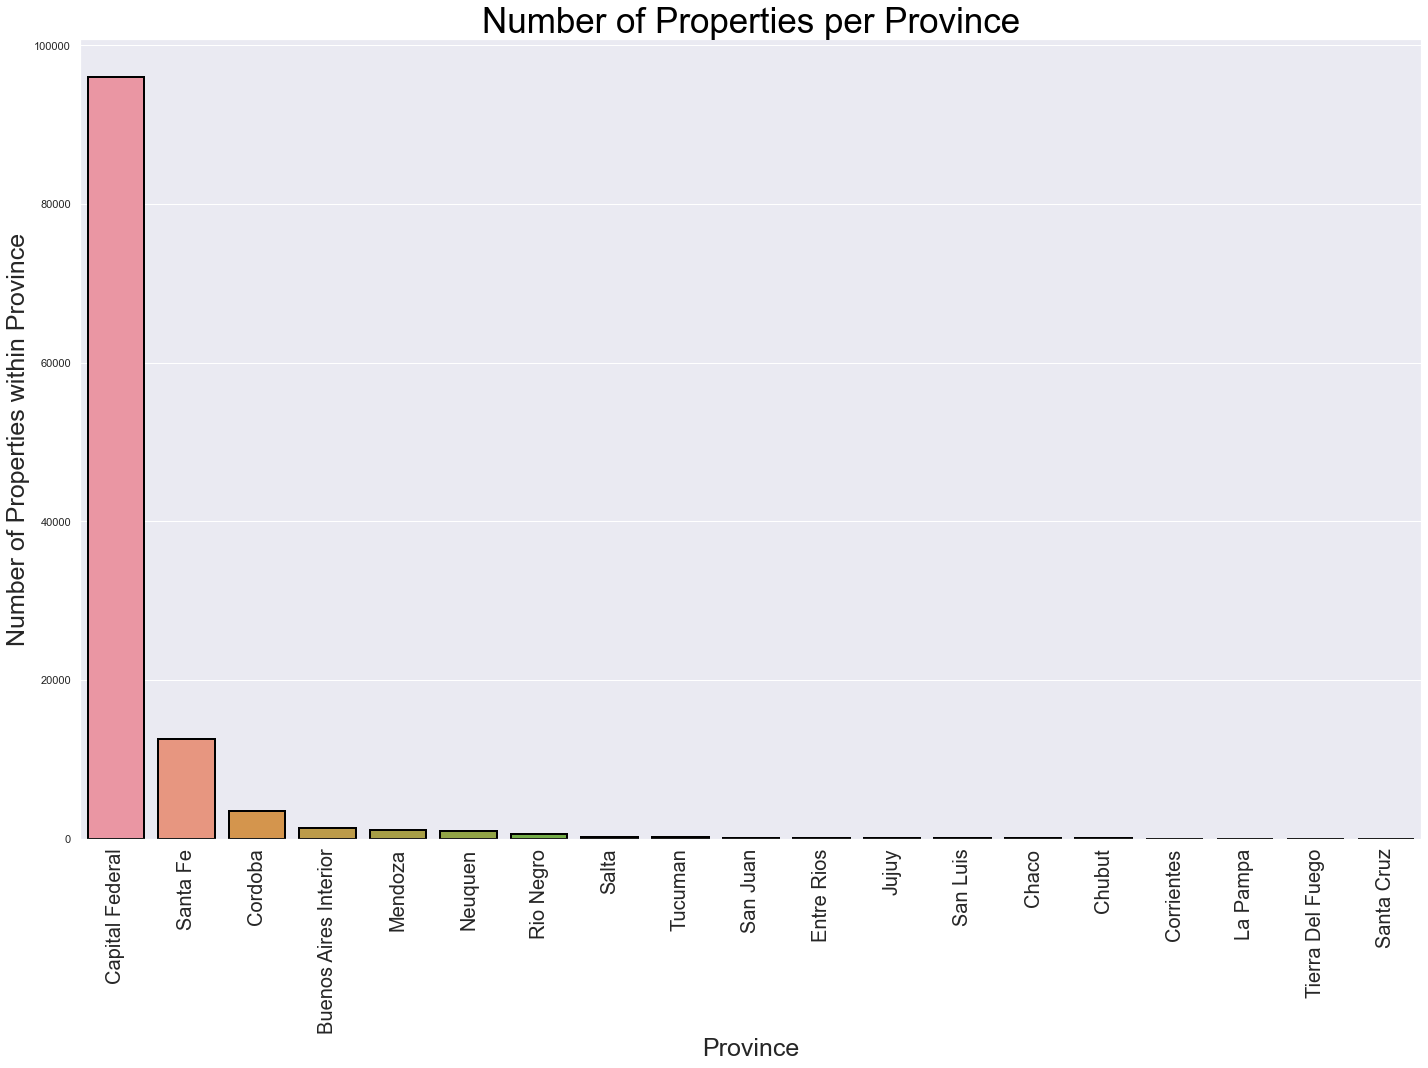

In [16]:
# plot number of properties per province
sns.set(style='darkgrid')
plt.figure(figsize = (20, 15))
sns.countplot(x= 'Province', data = df5, edgecolor = 'black', linewidth = 2, order = df5['Province'].value_counts().index)  #sort highest to lowest
plt.ylabel('Number of Properties within Province', fontsize = 25)
plt.xlabel('Province', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.title('Number of Properties per Province', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()

### Province count insights: <span style="color:green"> The city of Buenos Aires and surrounding metro area has it's own province (Capital Federal); this province dominates total listings and will contain the most available investment options.  </span> 


In [17]:
# plot number of rows per city
#sns.set(style='darkgrid')
#plt.figure(figsize = (20, 15))
#sns.countplot(x= 'City', data = df5, edgecolor = 'black', linewidth = 2, order = df5['City'].value_counts().iloc[:50].index)  #sort highest to lowest
#plt.ylabel('Number of Properties', fontsize = 25)
#plt.xlabel('Subunit / City', fontsize = 25)
#plt.xticks(rotation = 90, fontsize = 20)
#plt.title('Properties by Subunit - Top 50', color = 'black', fontsize = 35)
#plt.tight_layout()
#plt.show()

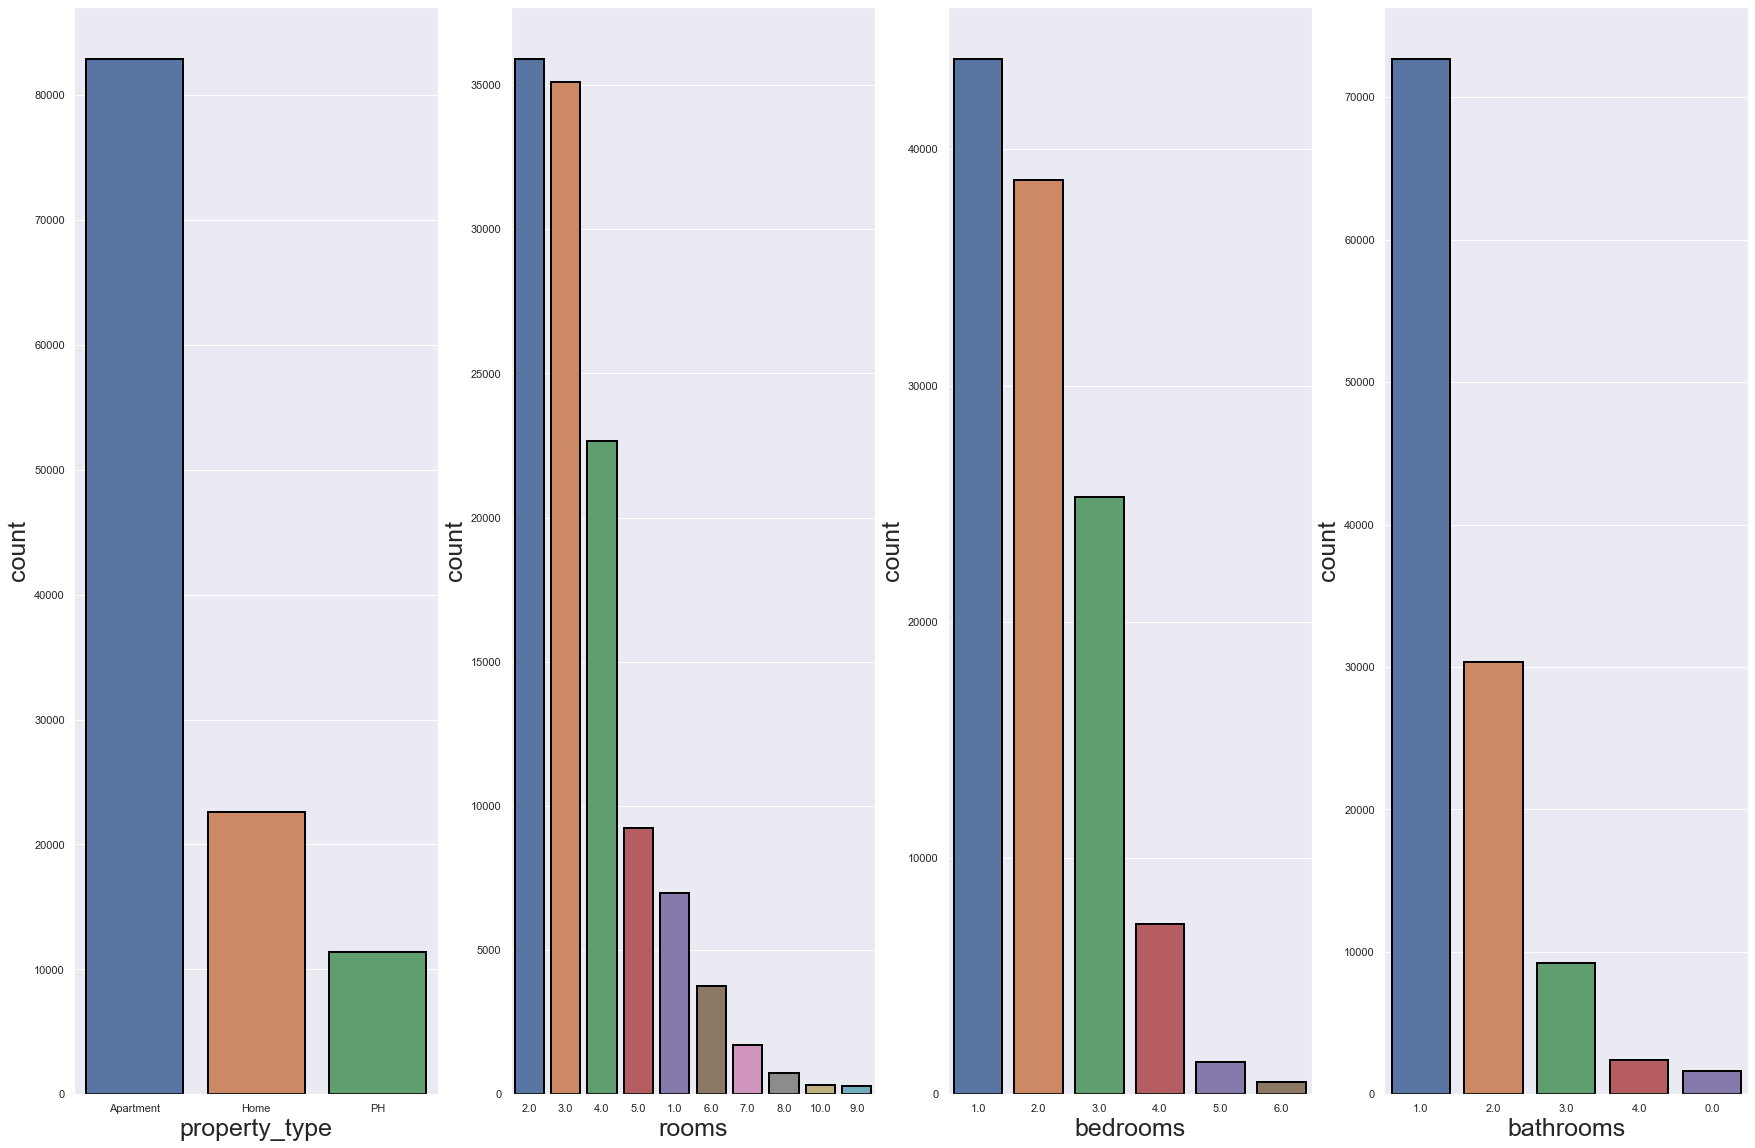

In [18]:
plt.rcParams["axes.labelsize"] = 25

# Filtered Data Analysis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (30,20))
plt1 = sns.countplot(x= 'property_type', data = df5, edgecolor = 'black', linewidth = 2, ax = ax1, order = df5['property_type'].value_counts().iloc[:10].index)  #sort highest to lowest
plt2 = sns.countplot(x= 'rooms', data = df5, edgecolor = 'black', linewidth = 2, ax = ax2, order = df5['rooms'].value_counts().iloc[:10].index)  #sort highest to lowest
plt3 = sns.countplot(x= 'bedrooms', data = df5, edgecolor = 'black', linewidth = 2, ax = ax3, order = df5['bedrooms'].value_counts().iloc[:6].index)  #sort highest to lowest
plt4 = sns.countplot(x= 'bathrooms', data = df5, edgecolor = 'black', linewidth = 2, ax = ax4, order = df5['bathrooms'].value_counts().iloc[:5].index)  #sort highest to lowest
#plt.xticks(rotation = 90, fontsize = 20)
#plt.xlabel(fontsize = 20)
#plt.tight_layout()
plt.show()

### Property Type: <span style="color:green"> The majority of available property types are apartments, followed by single family homes and horizontal properties (condos).   </span> 
### Total Rooms count: <span style="color:green">After 2 room properties,  3 and 4 room properties far outnumber the other properties, driven by apartment and condo types. </span> 
### Bedrooms: <span style="color:green"> Of the properties we are interested in, 2 bedroom properties have the highest count, followed by 3 bedroom properties.  There are over 70k 2+ bedroom properties to analyze.</span> 
### Bathrooms: <span style="color:green"> Single bathroom properties have more than double the count of two bathroom properties.</span> 

Text(0.5, 1.0, 'Province vs Surface Area (total)')

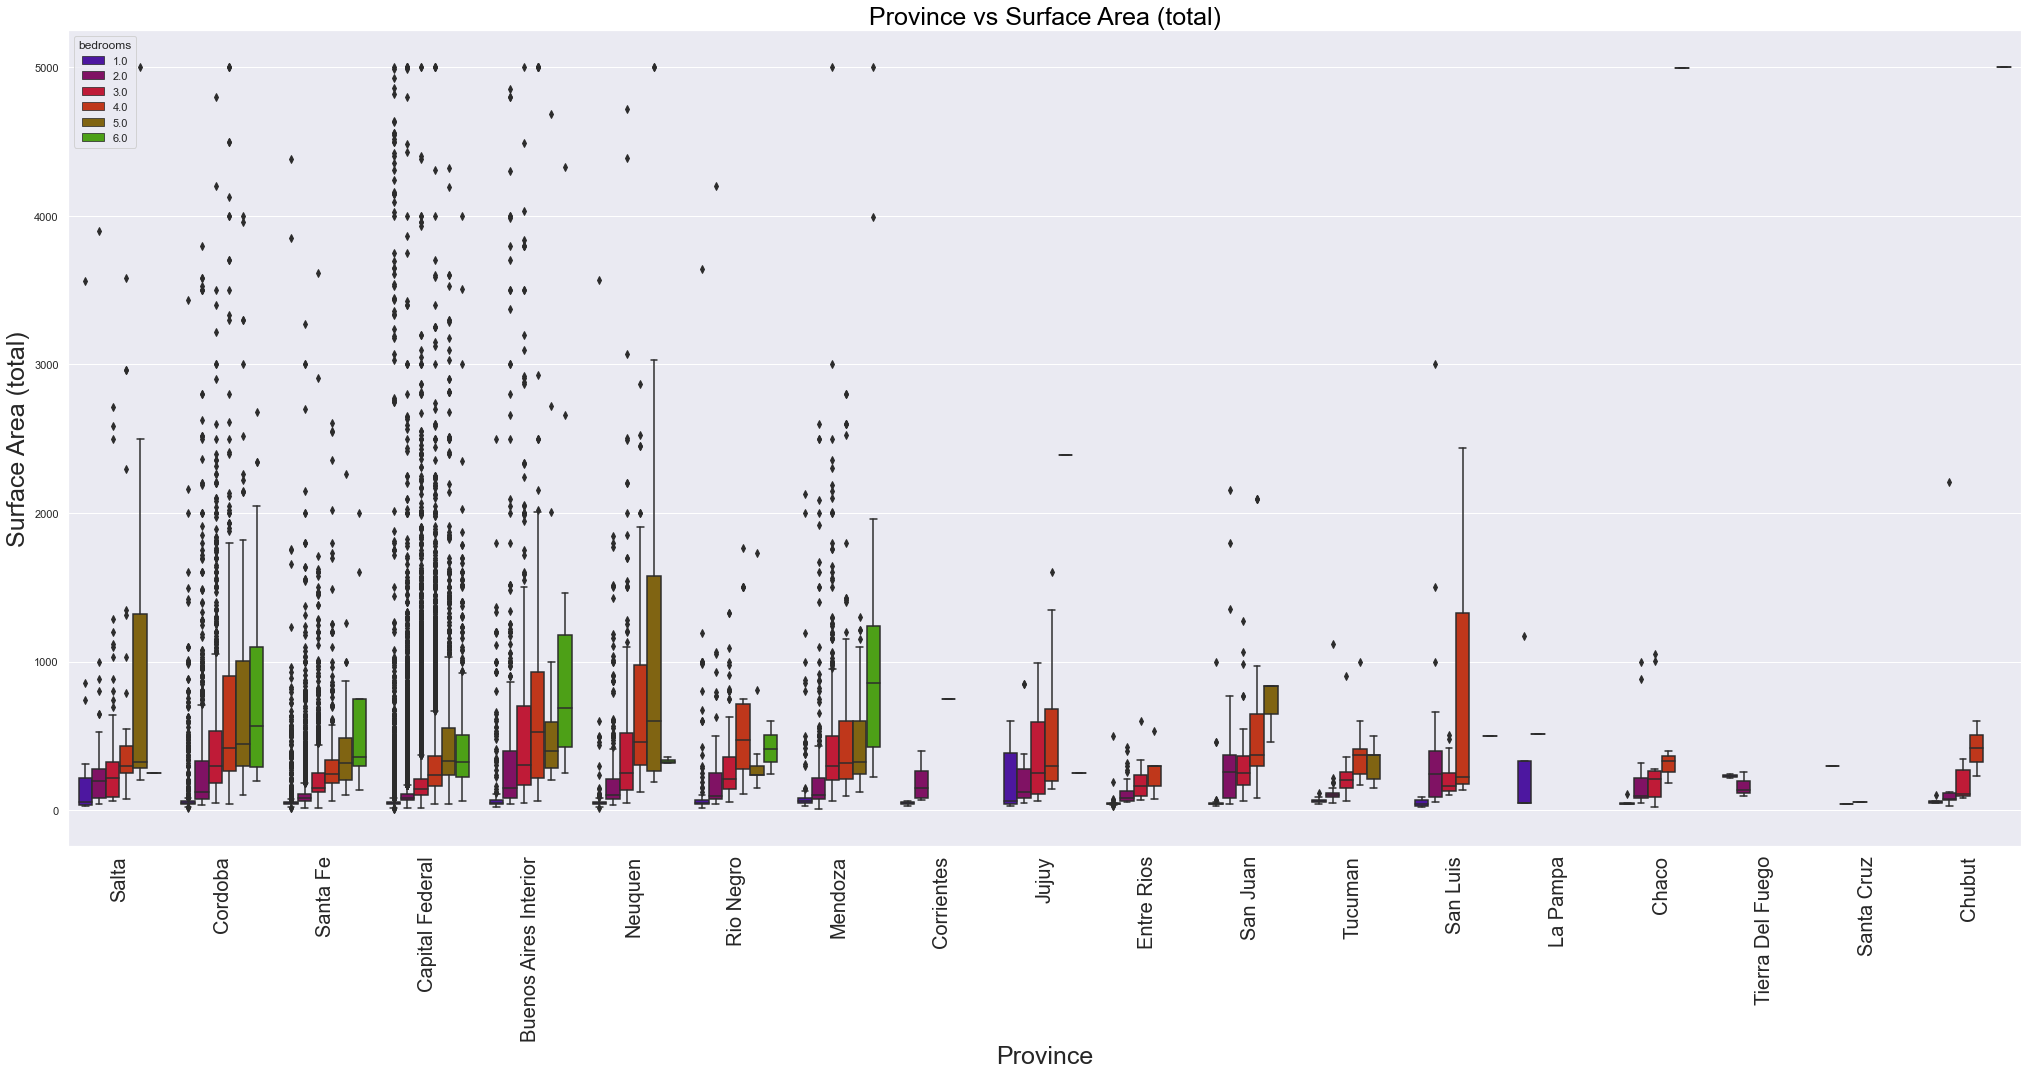

In [19]:
# box plot province vs area
sns.set(style='darkgrid')
plt.figure(figsize = (35, 15))
#plt.scatter(df5['surface_total'], df5['bedrooms'], alpha=0.05, c = df5['bedrooms'], cmap = 'brg', s =500)
sns.boxplot(x = df5['Province'], y = df5['surface_total'], orient = 'v', hue = df5['bedrooms'],  palette="brg")
#sns.violinplot(x = df5['Province'], y = df5['surface_total'], hue = df5['bedrooms'], alpha = 0.5, palette="brg", bw=.3)

#plt.colorbar()
plt.ylabel('Surface Area (total)', fontsize = 25)
plt.xlabel('Province', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.title('Province vs Surface Area (total)', color = 'black', fontsize = 25)

### Total Surface Area: <span style="color:green"> Capital Federal province has a large number of outliers however the average property size is smaller than other provinces.  This is driven partly by the high number of apartments within the province.  Unsurprisingly, properties with more bedrooms, on average, have larger total areas.</span> 

Text(0.5, 1.0, 'Province vs Price / Area ($/m^2)')

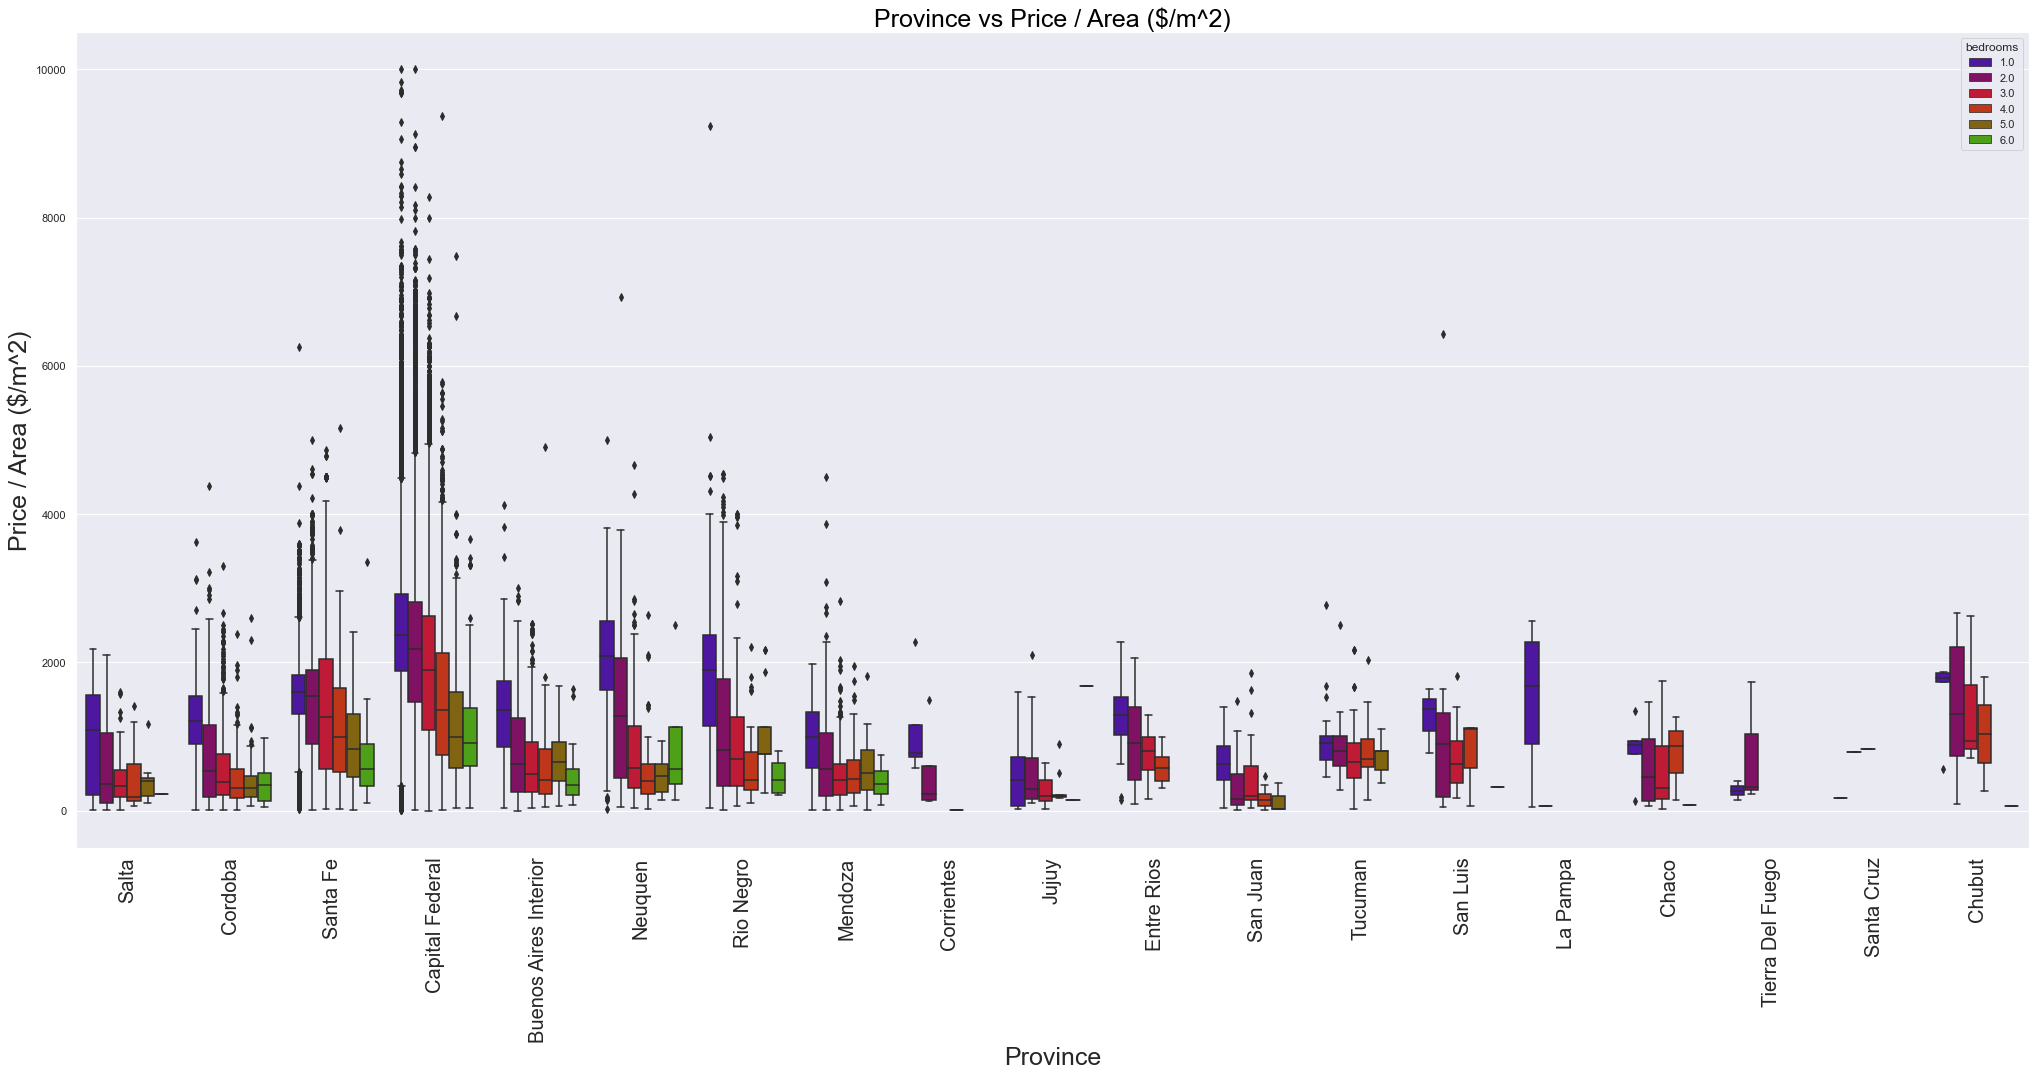

In [20]:
# box plot province vs price/area
sns.set(style='darkgrid')
plt.figure(figsize = (35, 15))
sns.boxplot(x = df5['Province'], y = df5['price_area'], orient = 'v', hue = df5['bedrooms'],  palette="brg")
#sns.violinplot(x = df5['Province'], y = df5['price_area'], hue = df5['bedrooms'], alpha = 0.5, palette="brg", bw=.3)

plt.ylabel('Price / Area ($/m^2)', fontsize = 25)
plt.xlabel('Province', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.title('Province vs Price / Area ($/m^2)', color = 'black', fontsize = 25)

### Price/Area: <span style="color:green"> Despite the average property area being smaller, Capital Federal province has higher average price/area values. Interestingly, for Capital Federal province, increasing the number of bedrooms lowers the average price/area.  More bang for your buck (or peso)!</span> 

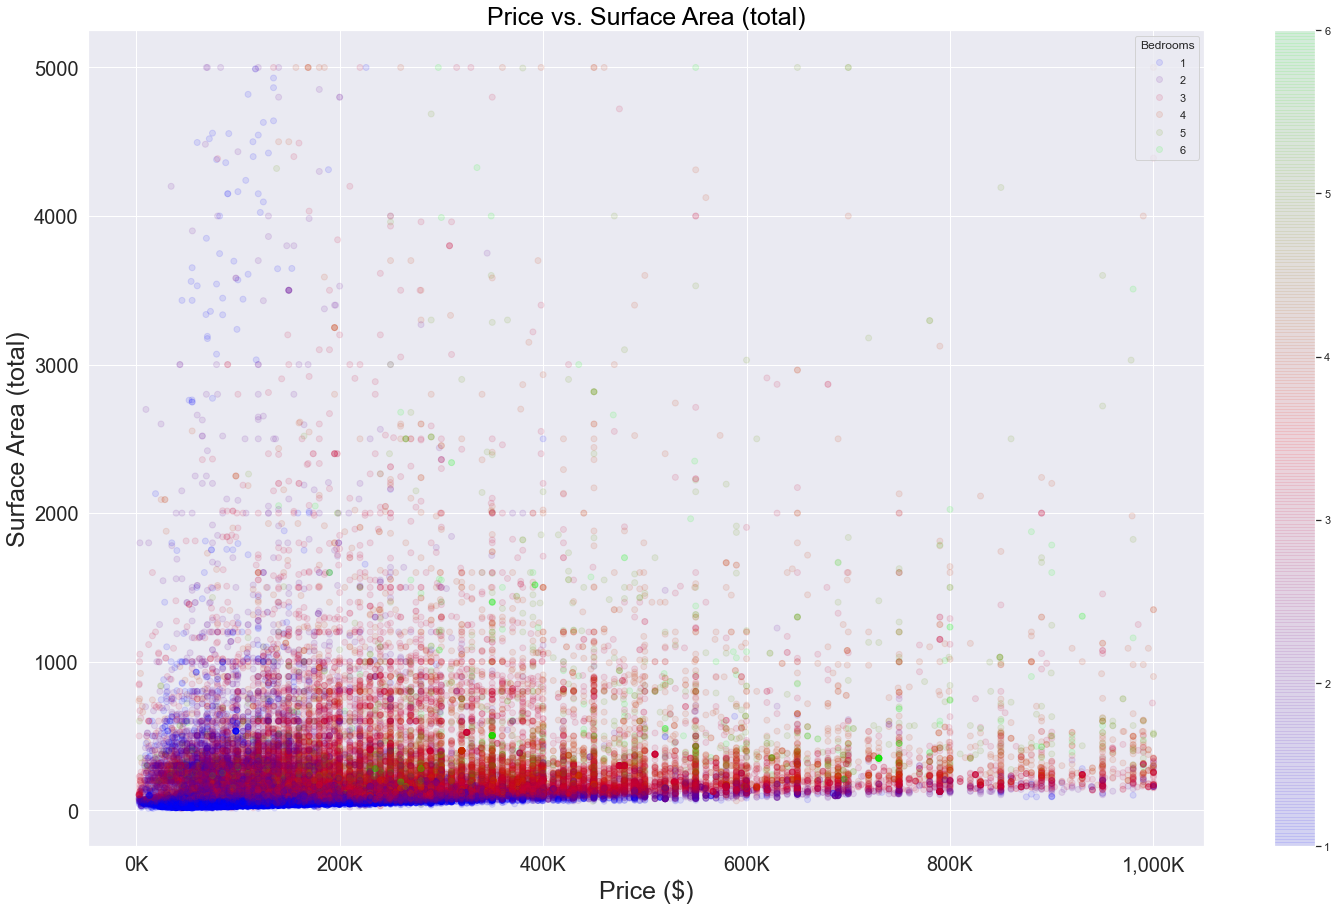

In [21]:
# outliers included scatter plot
fig, ax = plt.subplots(figsize = (25,15))
cb1 = ax.scatter(x = df5['price'], y = df5['surface_total'], c= df5['bedrooms'], alpha = 0.1,  cmap='brg')
plt.colorbar(cb1)
legend1 = ax.legend(*cb1.legend_elements(num=5), loc="upper right", title="Bedrooms")

plt.xlabel('Price ($)', fontsize = 25)
plt.ylabel('Surface Area (total)', fontsize = 25)

from matplotlib.ticker import FuncFormatter    #  control the x-axis numbering
f = lambda x, pos: f'{x/10**3:,.0f}K'    # thousands
#f = lambda x, pos: f'{x/10**6:,.0f}M'   # millions
ax.xaxis.set_major_formatter(FuncFormatter(f))

plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.title('Price vs. Surface Area (total)', color = 'black', fontsize = 25)
plt.show()

### Price/Area: <span style="color:green"> In general, the 1 bedroom properties are the least expensive, with additional bedrooms adding to the price.  </span> 

---------------------------------------------------------------------------

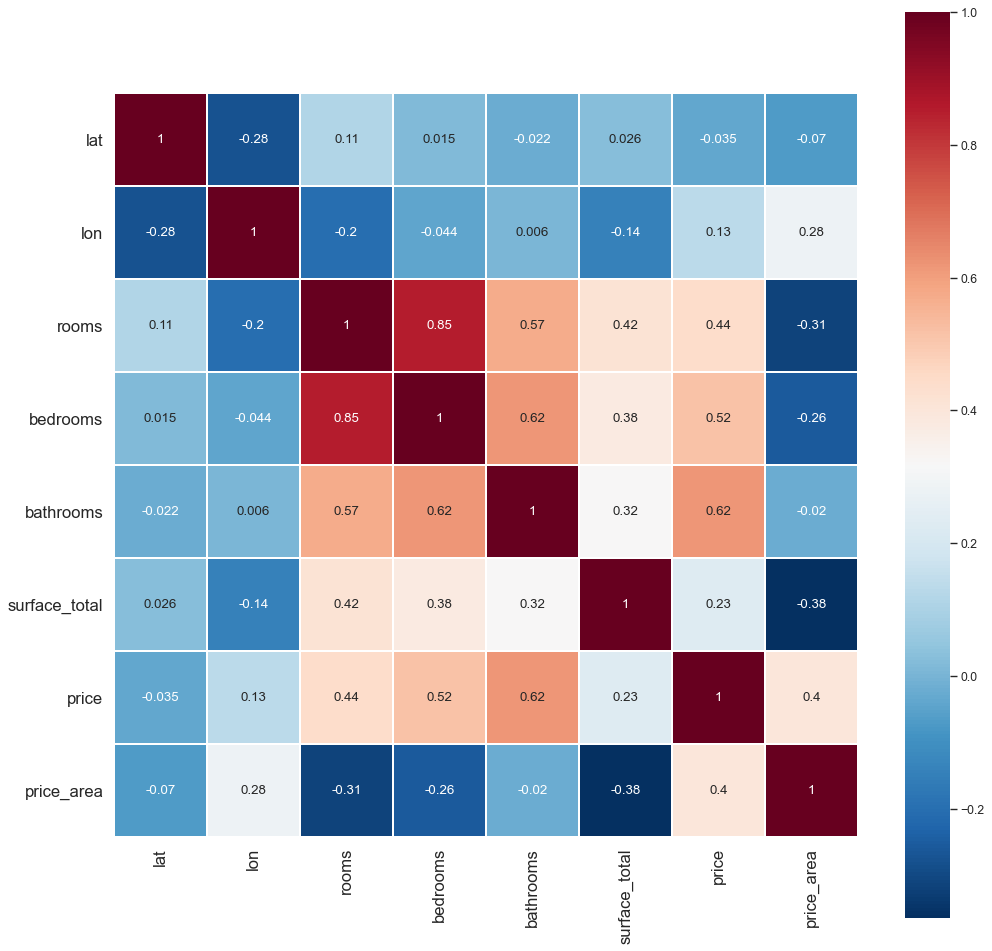

In [22]:
# plot correlation matrix
plotCorrelationMatrix(df5, 15)

### Parameter Correlation: <span style="color:green"> Price is most positively correlated to the existence of bathrooms and bedrooms, just like you would think!  Latitude and Longitude are not highly correlated to price.  </span> 

### Correlation matrix insights: <span style="color:green">  </span> 
* Positive correlations:
   * Total rooms vs bedrooms
   * Total rooms vs bathrooms
   * Total rooms vs price
   * Bedrooms vs bathrooms
   * Bedrooms vs price
   * Bathrooms vs price
   * surface_total vs area_price


###  <span style="color:green">Descriptive Statistics for Filtered DataFrame</span> 


In [23]:
df5.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00
mean,-34.59,-59.10,3.16,2.02,1.49,147.75,187238.89,2013.25
std,1.52,2.05,1.46,1.01,0.80,266.23,143264.92,1083.51
min,-53.79,-72.28,1.00,1.00,0.00,10.00,2687.57,2.01
25%,-34.63,-58.64,2.00,1.00,1.00,50.00,95000.00,1278.57
50%,-34.60,-58.45,3.00,2.00,1.00,76.00,145000.00,1991.38
75%,-34.52,-58.41,4.00,3.00,2.00,140.00,230000.00,2661.29
max,-22.18,-56.67,35.00,6.00,12.00,5000.00,1000000.00,10000.00


###  <span style="color:green">Create Boxplots</span> 

Each variable plotted individually.


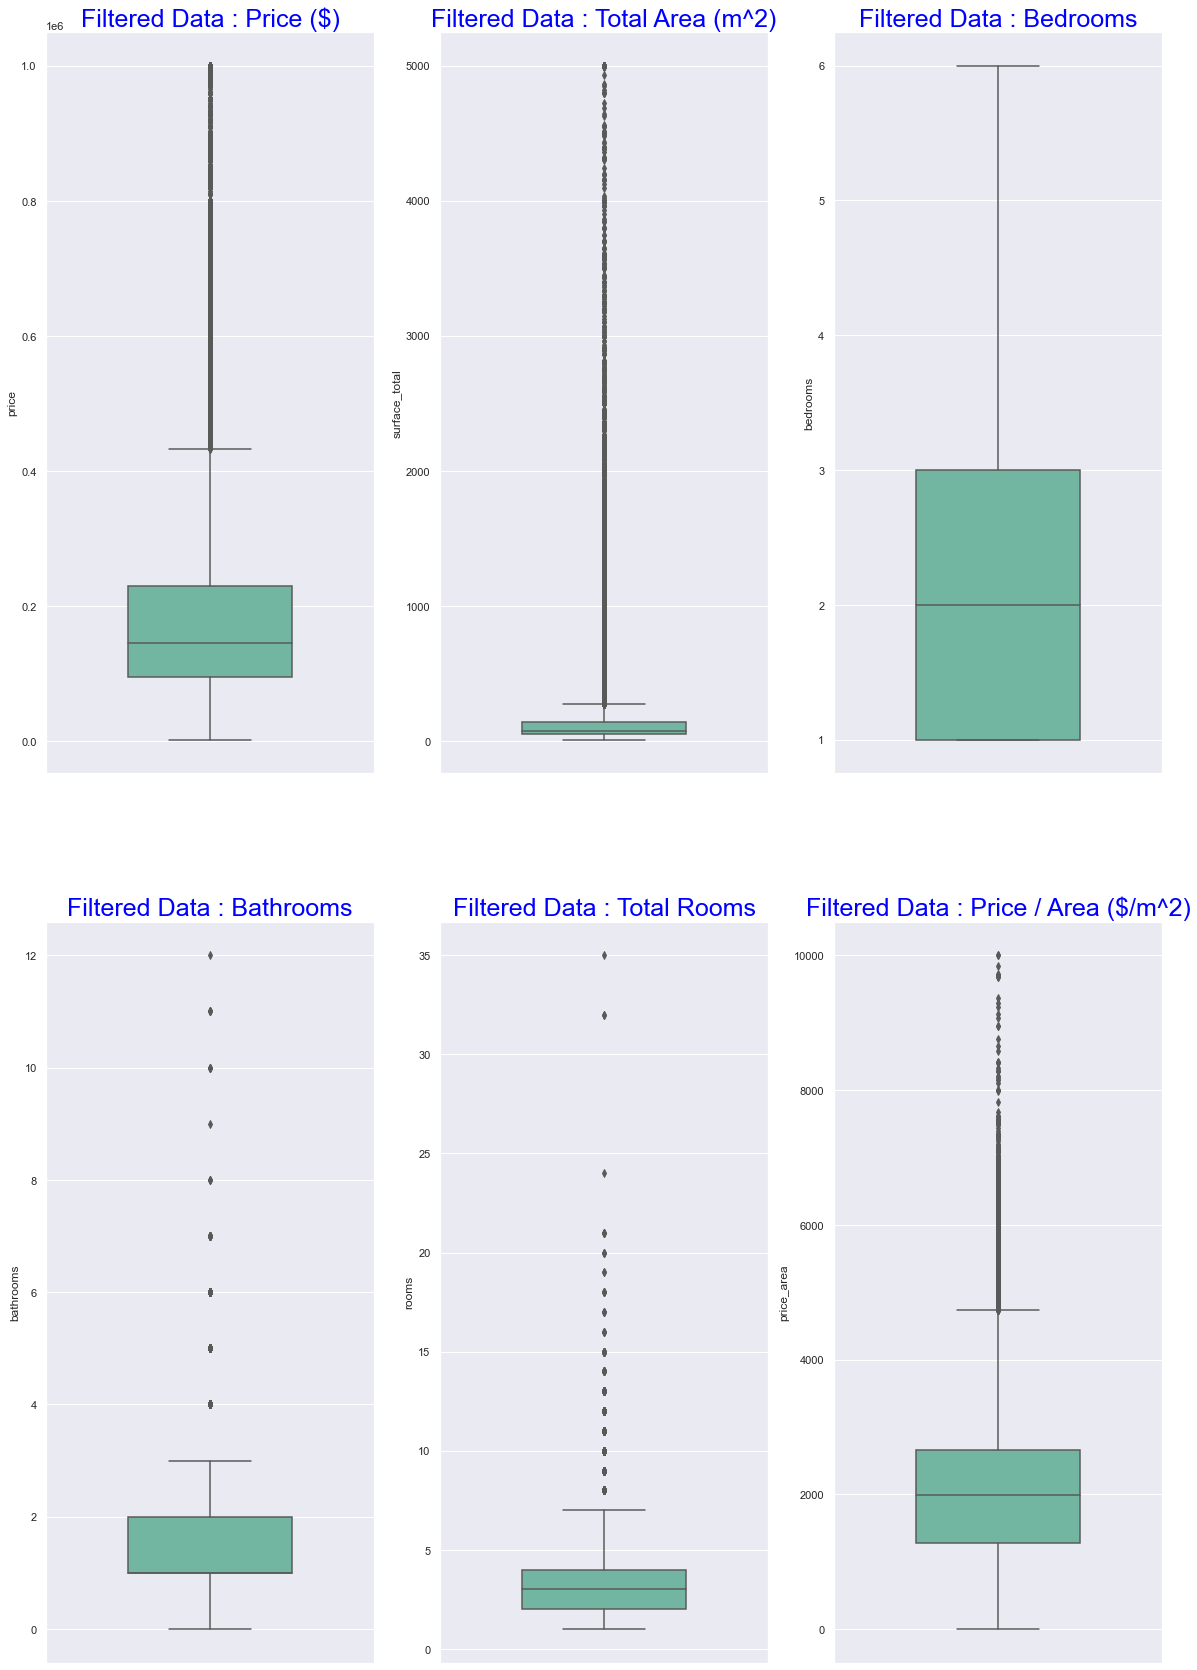

In [24]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (20,30))
plt1 = sns.boxplot(df5['price'], ax = axs[0,0], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Price ($)',fontsize=25, color='blue')
plt2 = sns.boxplot(df5['surface_total'], ax = axs[0,1], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Total Area (m^2)',fontsize=25, color='blue')
plt3 = sns.boxplot(df5['bedrooms'], ax = axs[0,2], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Bedrooms',fontsize=25, color='blue')
plt1 = sns.boxplot(df5['bathrooms'], ax = axs[1,0], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Bathrooms',fontsize=25, color='blue')
plt2 = sns.boxplot(df5['rooms'], ax = axs[1,1], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Total Rooms',fontsize=25, color='blue')
plt3 = sns.boxplot(df5['price_area'], ax = axs[1,2], orient = 'v', palette = 'Set2', width = 0.5).set_title('Filtered Data : Price / Area ($/m^2)',fontsize=25, color='blue')

#plt.tight_layout()

### <span style="color:green">Create Quartiles</span> 

Q1 should contain the Xth percentile for all columns in the dataframe while Q3 should contain the Yth percentile for all the columns in the dataframe.  
IQR (interquartile range) **(IQR = Q3 - Q1)** for all columns in the dataframe.

In [25]:
# calculate Xth percentile, Yth percentile and IQR for all columns
q05 = df5.quantile(0.05)
q15 = df5.quantile(0.15)
q25 = df5.quantile(0.25)
q75 = df5.quantile(0.75)
q85 = df5.quantile(0.85)
q95 = df5.quantile(0.95)
iqr = q95 - q05          # 5th percentile to 95th percentile
print('IQR: ')
print(iqr)

IQR: 
lat                  5.11
lon                  6.64
rooms                5.00
bedrooms             3.00
bathrooms            2.00
surface_total      421.00
price           418000.00
price_area        3497.47
dtype: float64


In [26]:
print('Descriptive Statistics for 1-6 bedroom properties:')
df5.describe()

Descriptive Statistics for 1-6 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00,116909.00
mean,-34.59,-59.10,3.16,2.02,1.49,147.75,187238.89,2013.25
std,1.52,2.05,1.46,1.01,0.80,266.23,143264.92,1083.51
min,-53.79,-72.28,1.00,1.00,0.00,10.00,2687.57,2.01
25%,-34.63,-58.64,2.00,1.00,1.00,50.00,95000.00,1278.57
50%,-34.60,-58.45,3.00,2.00,1.00,76.00,145000.00,1991.38
75%,-34.52,-58.41,4.00,3.00,2.00,140.00,230000.00,2661.29
max,-22.18,-56.67,35.00,6.00,12.00,5000.00,1000000.00,10000.00


In [27]:
one_bed = df5['bedrooms'] == 1
df5_1 = df5[one_bed]
print('Descriptive Statistics for 1 bedroom properties:')
df5_1.describe()

Descriptive Statistics for 1 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,43832.00,43832.00,43832.00,43832.00,43832.00,43832.00,43832.00,43832.00
mean,-34.60,-59.00,1.89,1.00,1.04,61.02,113057.03,2283.66
std,1.46,1.73,0.53,0.00,0.30,154.54,63099.14,938.10
min,-53.77,-71.67,1.00,1.00,0.00,10.00,3006.65,8.92
25%,-34.62,-58.59,2.00,1.00,1.00,39.00,74500.00,1681.82
50%,-34.60,-58.45,2.00,1.00,1.00,46.00,99000.00,2196.97
75%,-34.53,-58.41,2.00,1.00,1.00,55.25,138000.00,2777.78
max,-22.18,-56.67,32.00,1.00,12.00,5000.00,980000.00,10000.00


In [28]:
two_plus_bed = df5['bedrooms'] >= 2
df5_2_plus = df5[two_plus_bed]
print('Descriptive Statistics for 2+ bedroom properties:')
df5_2_plus.describe()

Descriptive Statistics for 2+ bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,73077.00,73077.00,73077.00,73077.00,73077.00,73077.00,73077.00,73077.00
mean,-34.58,-59.16,3.93,2.63,1.75,199.78,231733.59,1851.06
std,1.56,2.21,1.30,0.79,0.88,303.07,158641.94,1131.45
min,-53.79,-72.28,1.00,2.00,0.00,10.00,2687.57,2.01
25%,-34.63,-58.65,3.00,2.00,1.00,76.00,128000.00,958.62
50%,-34.60,-58.45,4.00,2.00,2.00,110.00,190000.00,1822.92
75%,-34.52,-58.41,4.00,3.00,2.00,200.00,285000.00,2555.56
max,-23.62,-56.67,35.00,6.00,11.00,5000.00,1000000.00,10000.00


In [29]:
# store mean of price_area to use later
two_plus_bed_mean_price_area= df5_2_plus['price_area'].mean()

In [30]:
two_bed = df5['bedrooms'] == 2
df5_2 = df5[two_bed]
print('Descriptive Statistics for 2 bedroom properties:')
df5_2.describe()

Descriptive Statistics for 2 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,38710.00,38710.00,38710.00,38710.00,38710.00,38710.00,38710.00,38710.00
mean,-34.62,-59.11,3.16,2.00,1.38,126.01,178179.67,2019.40
std,1.54,2.10,0.63,0.00,0.58,203.96,110600.87,1121.23
min,-53.79,-72.26,1.00,2.00,0.00,10.00,2687.57,2.01
25%,-34.63,-58.61,3.00,2.00,1.00,65.00,110000.00,1233.69
50%,-34.60,-58.45,3.00,2.00,1.00,80.00,155000.00,2000.00
75%,-34.54,-58.41,3.00,2.00,2.00,111.00,220000.00,2685.19
max,-23.62,-56.67,35.00,2.00,11.00,5000.00,1000000.00,10000.00


In [31]:
three_bed = df5['bedrooms'] == 3
df5_3 = df5[three_bed]
print('Descriptive Statistics for 3 bedroom properties:')
df5_3.describe()

Descriptive Statistics for 3 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,25269.00,25269.00,25269.00,25269.00,25269.00,25269.00,25269.00,25269.00
mean,-34.52,-59.19,4.38,3.00,1.99,235.18,272270.86,1785.18
std,1.54,2.27,0.98,0.00,0.83,297.68,166059.93,1143.16
min,-50.35,-72.28,1.00,3.00,0.00,14.00,2699.85,3.25
25%,-34.63,-58.67,4.00,3.00,1.00,104.00,160000.00,833.33
50%,-34.60,-58.45,4.00,3.00,2.00,147.00,239000.00,1722.22
75%,-34.51,-58.41,4.00,3.00,2.00,233.00,345000.00,2509.62
max,-23.80,-56.67,20.00,3.00,8.00,5000.00,1000000.00,8275.86


In [32]:
four_bed = df5['bedrooms'] == 4
df5_4 = df5[four_bed]
print('Descriptive Statistics for 4 bedroom properties:')
df5_4.describe()

Descriptive Statistics for 4 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,7210.00,7210.00,7210.00,7210.00,7210.00,7210.00,7210.00,7210.00
mean,-34.55,-59.22,5.61,4.00,2.59,381.99,342774.12,1395.61
std,1.63,2.40,1.28,0.00,1.00,447.34,205082.56,976.30
min,-45.92,-71.67,1.00,4.00,0.00,39.00,2761.21,3.75
25%,-34.64,-58.71,5.00,4.00,2.00,170.00,198000.00,600.00
50%,-34.60,-58.47,5.00,4.00,3.00,240.00,295000.00,1202.86
75%,-34.48,-58.41,6.00,4.00,3.00,397.75,440000.00,1987.31
max,-24.16,-56.67,20.00,4.00,7.00,5000.00,1000000.00,9365.08


In [33]:
five_bed = df5['bedrooms'] == 5
df5_5 = df5[five_bed]
print('Descriptive Statistics for 5 bedroom properties:')
df5_5.describe()

Descriptive Statistics for 5 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,1371.00,1371.00,1371.00,1371.00,1371.00,1371.00,1371.00,1371.00
mean,-34.56,-59.55,6.82,5.00,3.10,545.35,365855.74,1034.29
std,1.89,2.85,1.57,0.00,1.19,620.25,220513.86,742.31
min,-41.17,-71.64,1.00,5.00,0.00,42.00,3129.37,5.22
25%,-34.67,-58.81,6.00,5.00,2.00,234.00,200000.00,467.54
50%,-34.60,-58.52,6.00,5.00,3.00,330.00,310000.00,882.72
75%,-34.44,-58.41,7.00,5.00,4.00,584.00,490000.00,1460.04
max,-24.17,-56.69,18.00,5.00,8.00,5000.00,1000000.00,7483.33


In [34]:
six_bed = df5['bedrooms'] == 6
df5_6 = df5[six_bed]
print('Descriptive Statistics for 6 bedroom properties:')
df5_6.describe()

Descriptive Statistics for 6 bedroom properties:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00
mean,-34.60,-59.29,7.88,6.00,3.22,535.67,356012.04,984.97
std,1.52,2.53,1.88,0.00,1.37,605.71,219729.29,676.03
min,-42.06,-71.53,3.00,6.00,0.00,62.00,9817.63,32.95
25%,-34.65,-58.65,7.00,6.00,2.00,230.00,205000.00,491.07
50%,-34.61,-58.46,7.00,6.00,3.00,350.00,298000.00,833.33
75%,-34.52,-58.40,8.00,6.00,4.00,503.00,450000.00,1368.42
max,-24.19,-56.68,21.00,6.00,9.00,5000.00,990000.00,3664.86


---------------------------------------------------------------------------

### <span style="color:green">Identify Outliers</span> 

* Calculate how many entries in the original dataframe.

* Using the quartiles and IQR calculated, identify the number of entries if you were to remove the outliers.

* Find the proportion of outliers that exist in the dataset.



In [35]:
# remove outliers from dataframe
df5_no_outliers = df5[~((df5 < (q15 - 1.5 * iqr)) | (df5 > (q85 + 1.5 * iqr))).any(axis=1)]  # removes values outside of IQR
print('After IQR applied')
df5_no_outliers.describe()

After IQR applied


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price,price_area
count,113250.00,113250.00,113250.00,113250.00,113250.00,113250.00,113250.00,113250.00
mean,-34.59,-59.01,3.10,1.98,1.46,117.01,182768.24,2050.16
std,1.36,1.81,1.36,0.98,0.75,119.58,134427.41,1048.93
min,-40.81,-70.15,1.00,1.00,0.00,10.00,2687.57,3.75
25%,-34.63,-58.61,2.00,1.00,1.00,50.00,94000.00,1344.83
50%,-34.60,-58.45,3.00,2.00,1.00,74.00,145000.00,2012.07
75%,-34.53,-58.41,4.00,3.00,2.00,130.00,230000.00,2677.17
max,-26.64,-56.67,11.00,6.00,5.00,841.00,920000.00,8275.86


In [36]:
print ("When we have not removed any outliers from the dataset, we have: " + str(len(df5))  + " entries") 
print ("When we have removed outliers from the dataset, we have: " + str(len(df5_no_outliers)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(df5_no_outliers)/len(df5)) ) 

When we have not removed any outliers from the dataset, we have: 116909 entries
When we have removed outliers from the dataset, we have: 113250 entries
The proportion of outliers which exist when compared to the dataframe are: 0.968702152956573


# <font color=red> Removing outliers discards all less expensive properties from analysis and is NOT recommended.</font>


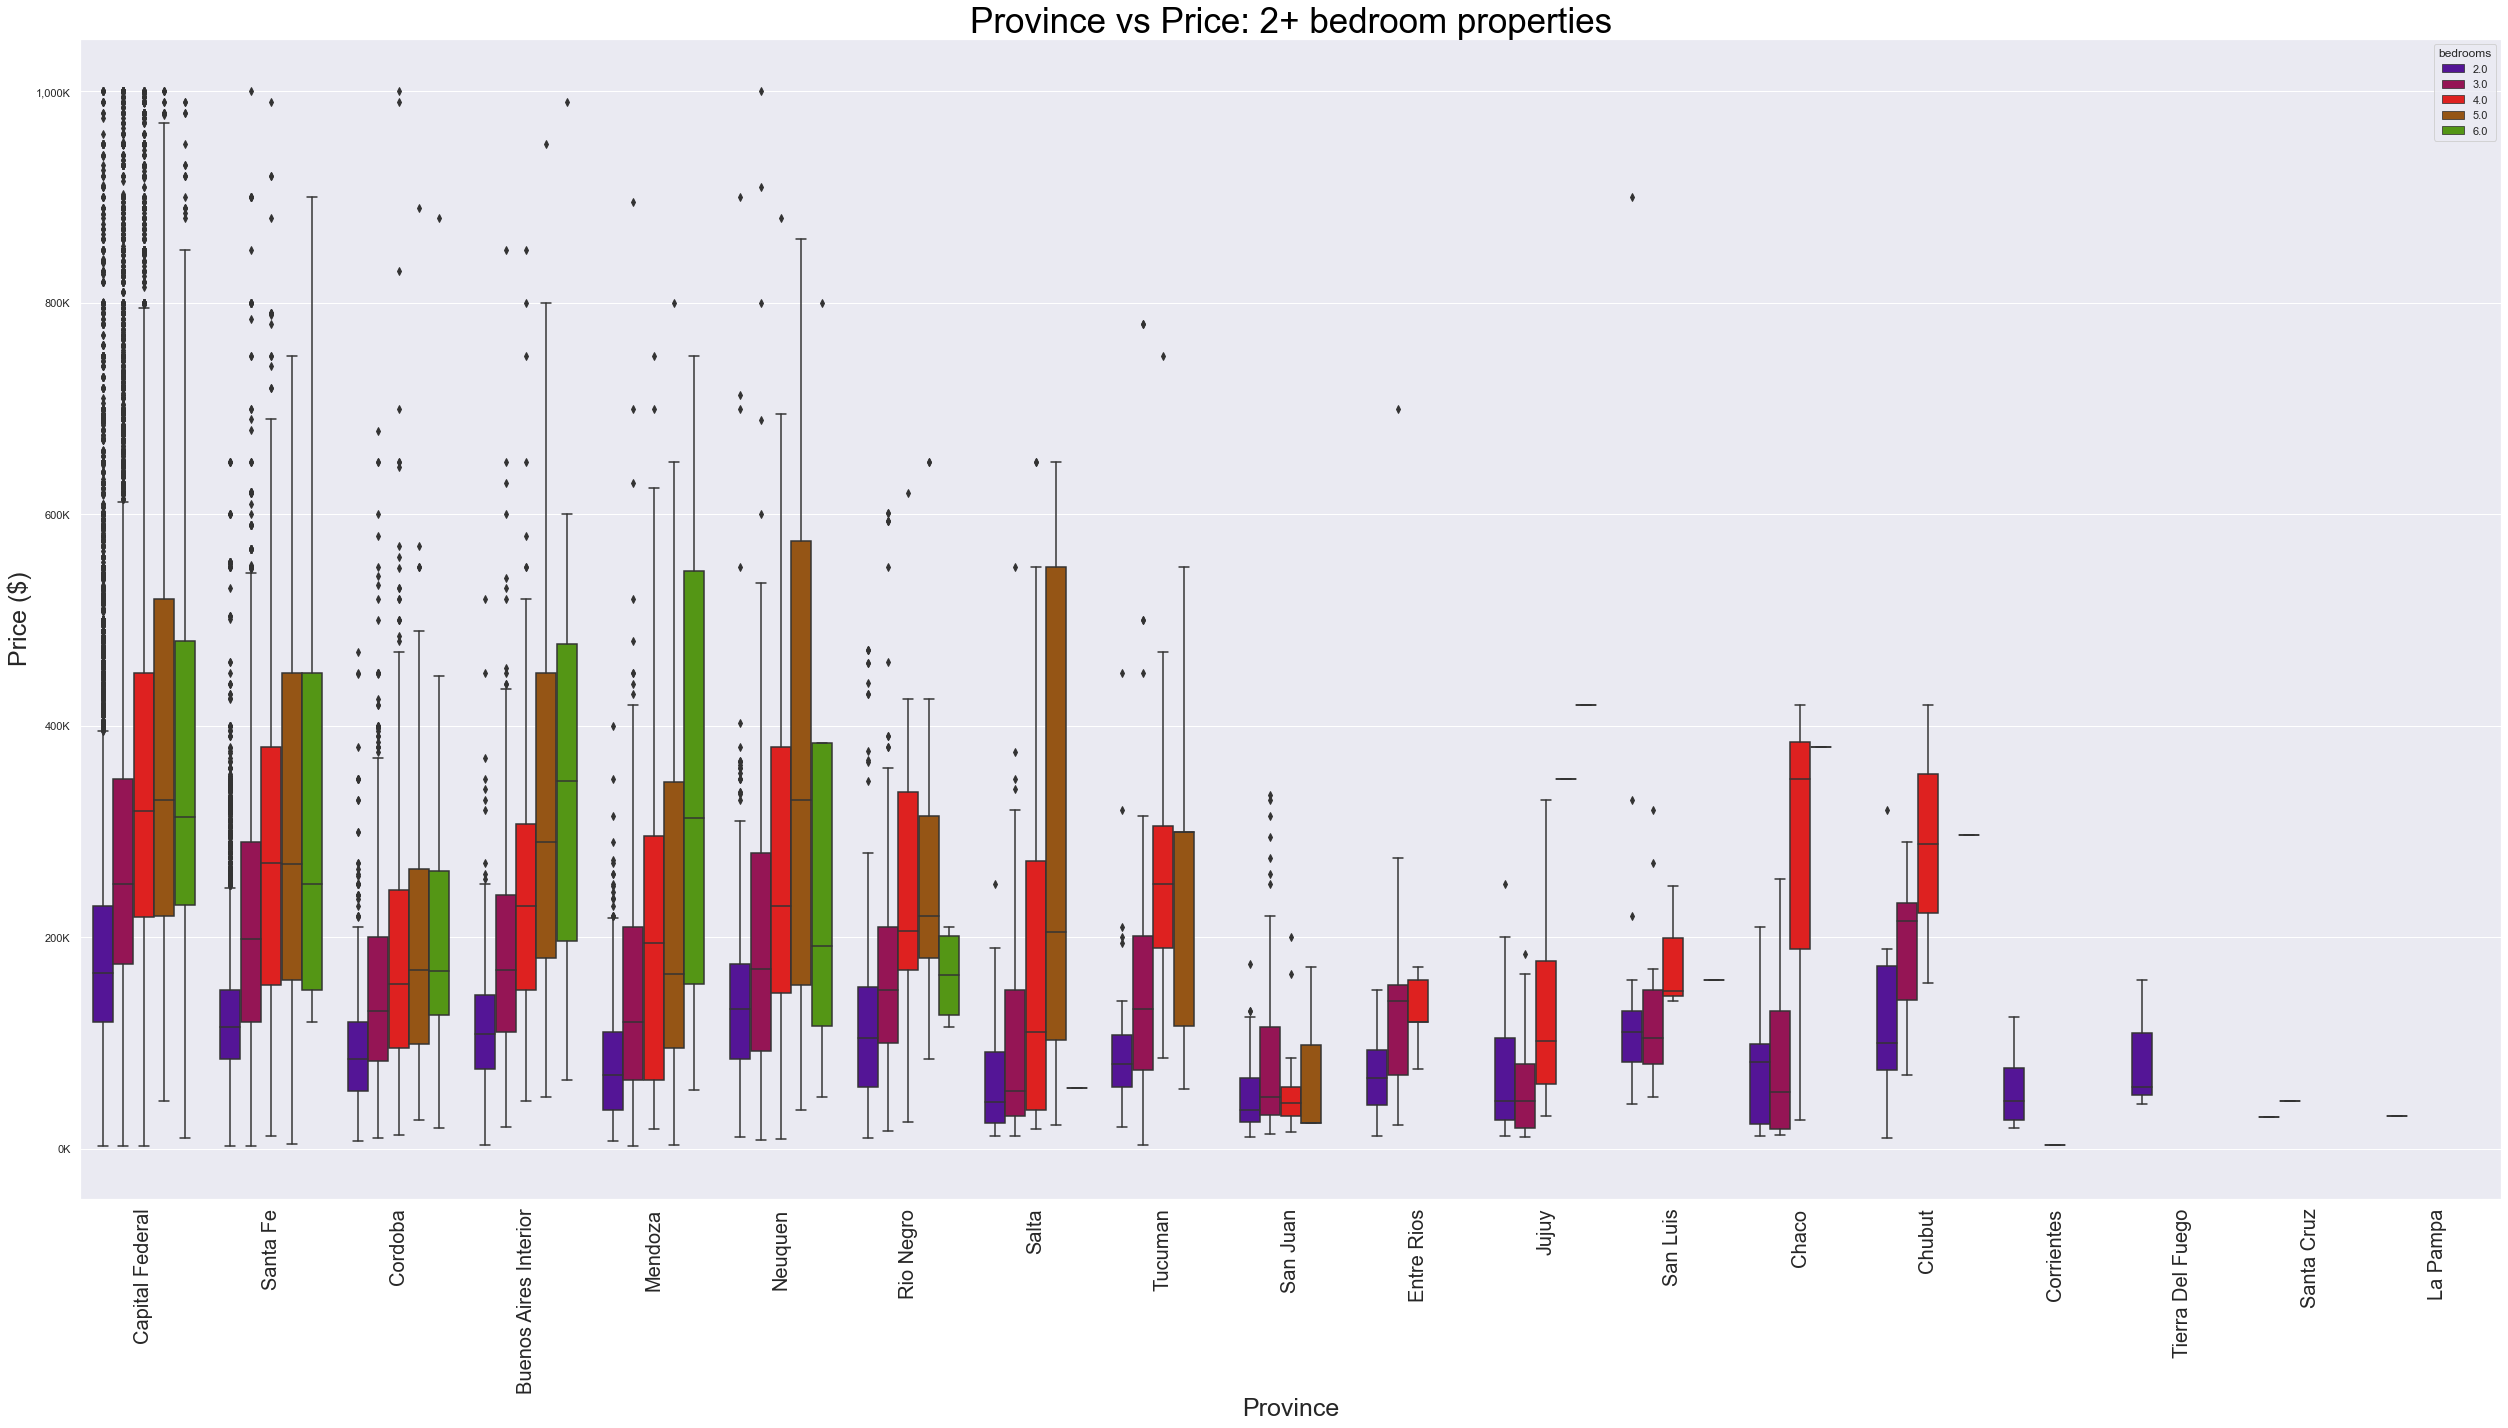

In [37]:
# Grouped boxplot

# remove 1 bedroom properties
bed_2_plus = df5['bedrooms'] > 1
df5_2_plus = df5[bed_2_plus]

fig, ax = plt.subplots(figsize = (35,20))
#sns.violinplot(x = df5_2_plus['Province'], y = df5_2_plus['price'], hue = df5_2_plus['bedrooms'], alpha = 0.5, palette="brg", bw=.5)
sns.boxplot(x = df5_2_plus['Province'], y = df5_2_plus['price'], hue = df5_2_plus['bedrooms'],  palette="brg", order = df5_2_plus['Province'].value_counts().iloc[:20].index)
plt.xlabel('Province', fontsize = 25)
plt.ylabel('Price ($)', fontsize = 25)

from matplotlib.ticker import FuncFormatter    #  control the y-axis numbering
f = lambda y, pos: f'{y/10**3:,.0f}K'  # thousands
#f = lambda y, pos: f'{y/10**6:,.0f}M'   # millions
ax.yaxis.set_major_formatter(FuncFormatter(f))

plt.xticks(rotation = 90, fontsize = 20)
plt.title('Province vs Price: 2+ bedroom properties', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()


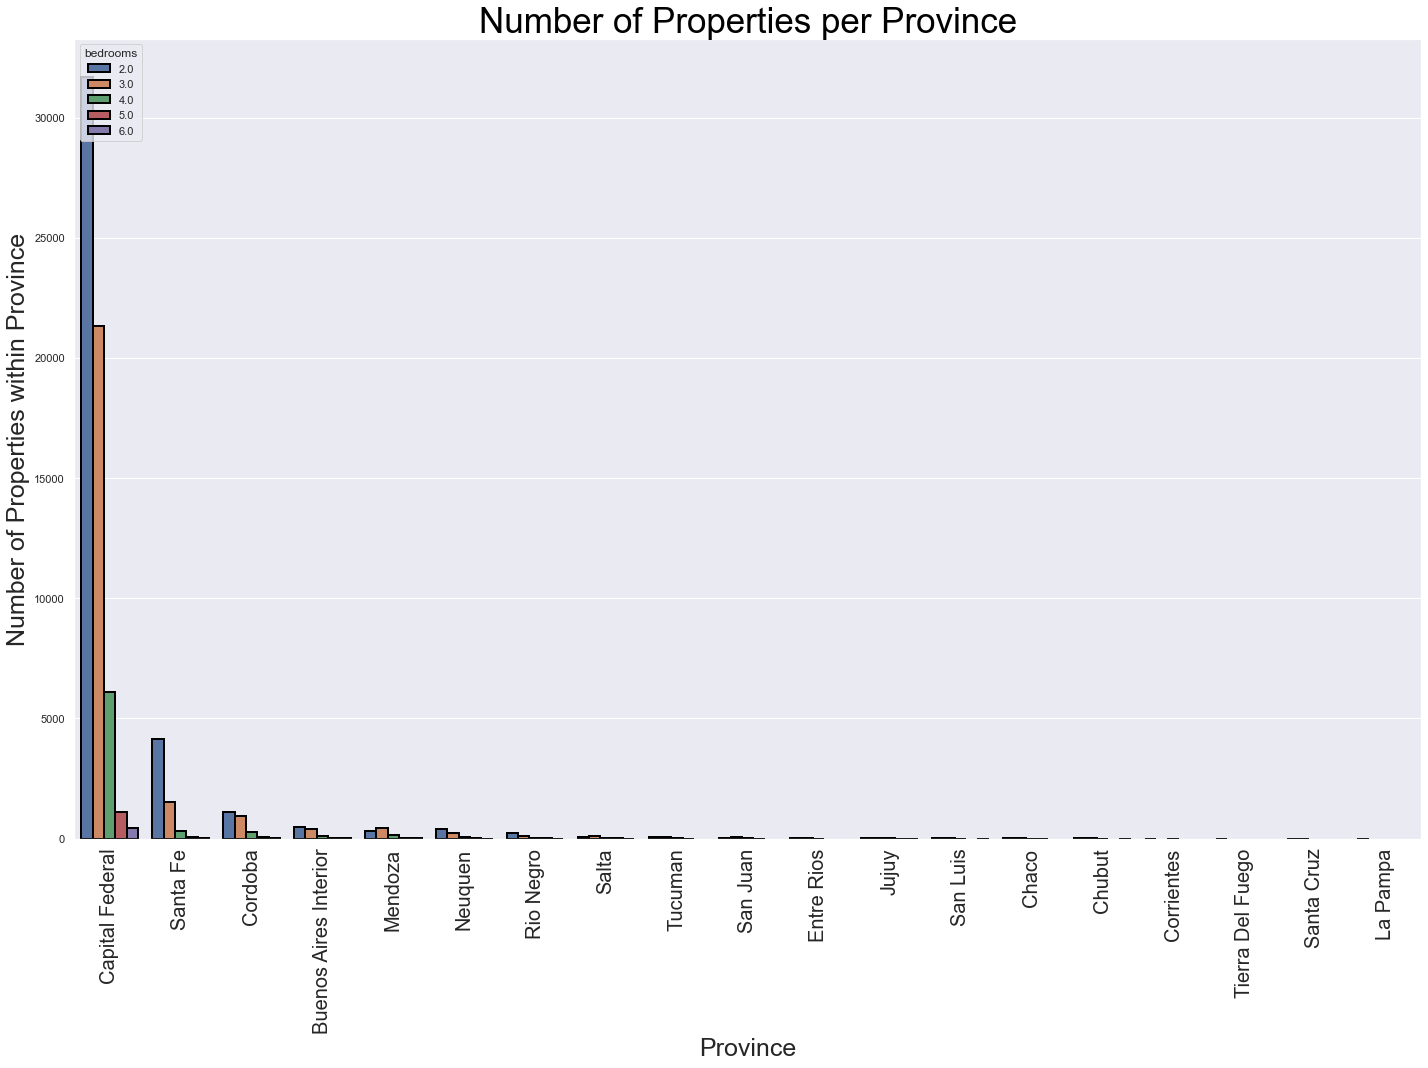

In [38]:
# plot number of properties per province
#fig, axs = plt.subplots(2,1,sharex='col', sharey='row')
#plt1 = sns.countplot(x= 'Province', data = df5_2_plus, edgecolor = 'black', linewidth = 2, order = df5_2_plus['Province'].value_counts().index)  #sort highest to lowest
#plt2 = sns.boxplot(x = df5_2_plus['Province'], y = df5_2_plus['price'], hue = df5_2_plus['bedrooms'],  palette="brg", order = df5_2_plus['Province'].value_counts().iloc[:20].index)
plt3 = sns.countplot(x= 'Province', data = df5_2_plus, hue = df5_2_plus['bedrooms'], edgecolor = 'black', linewidth = 2, order = df5_2_plus['Province'].value_counts().index)  #sort highest to lowest

plt.ylabel('Number of Properties within Province', fontsize = 25)
plt.xlabel('Province', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.title('Number of Properties per Province', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()

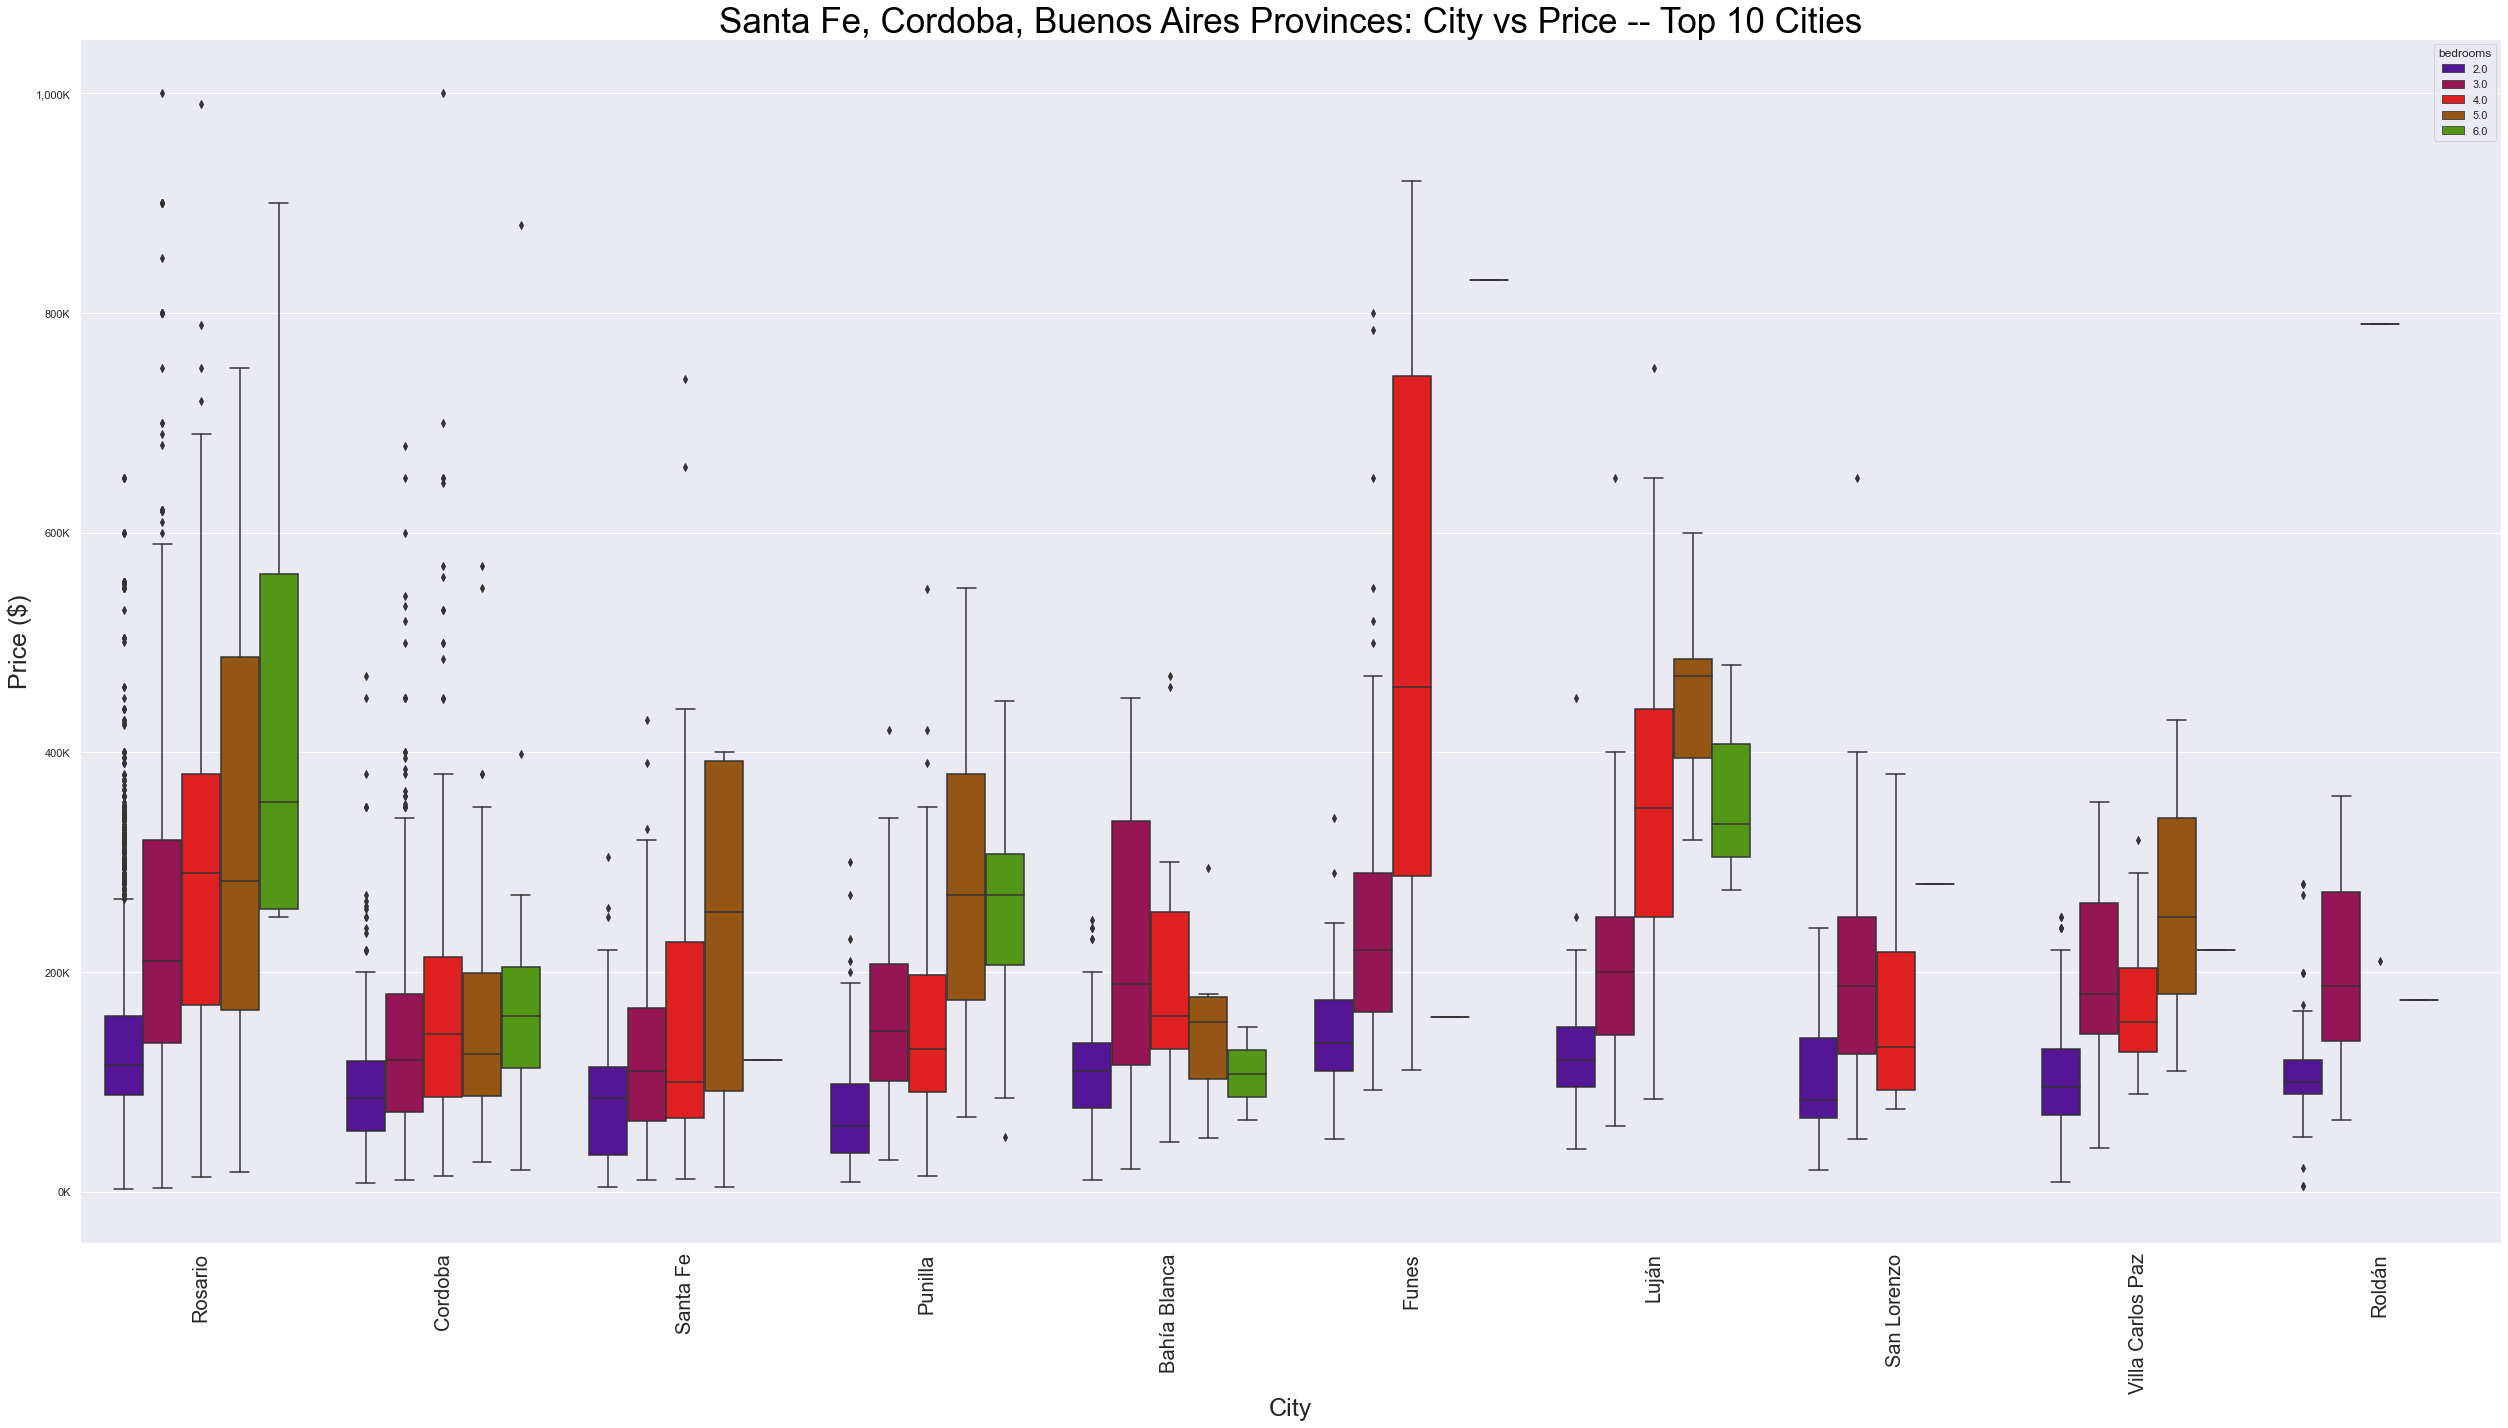

In [39]:
# focus on Capital Federal province, using only 2+ bedroom properties
#prov_cf = df5_2_plus['Province'] == 'Capital Federal'
#df5_prov_cf = df5_2_plus[prov_cf]
prov_keep = ['Santa Fe', 'Cordoba', 'Buenos Aires Interior']

df_prov_3 = df5_2_plus.loc[(df5_2_plus['Province'].isin(prov_keep))]

fig, ax = plt.subplots(figsize = (35,20))
#sns.violinplot(x = df5_prov_cf['City'], y = df5_prov_cf['price'], hue = df5_prov_cf['bedrooms'], alpha = 0.5, palette="brg", bw=.5, order = df5_prov_cf['City'].value_counts().iloc[:10].index)  # only show top 10 cities by property count
sns.boxplot(x = df_prov_3['City'], y = df_prov_3['price'], hue = df_prov_3['bedrooms'],  palette="brg", order = df_prov_3['City'].value_counts().iloc[:10].index)

plt.xlabel('City', fontsize = 25)
plt.ylabel('Price ($)', fontsize = 25)

from matplotlib.ticker import FuncFormatter    #  control the y-axis numbering
f = lambda y, pos: f'{y/10**3:,.0f}K'  # thousands
#f = lambda y, pos: f'{y/10**6:,.0f}M'   # millions
ax.yaxis.set_major_formatter(FuncFormatter(f))

plt.xticks(rotation = 90, fontsize = 20)
plt.title('Santa Fe, Cordoba, Buenos Aires Provinces: City vs Price -- Top 10 Cities', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()

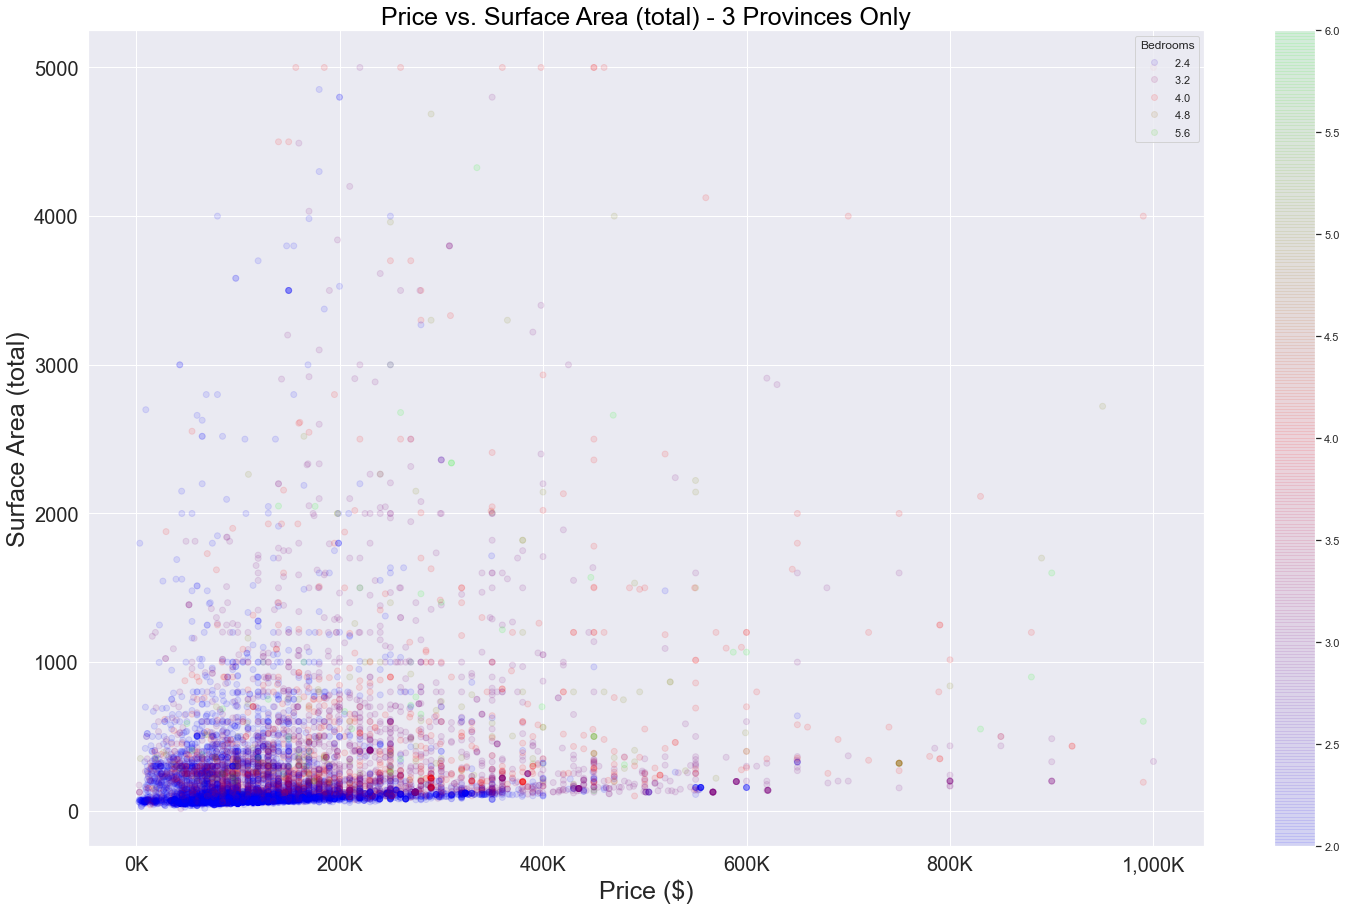

In [40]:
# 3 provinces included scatter plot
fig, ax = plt.subplots(figsize = (25,15))
cb1 = ax.scatter(x = df_prov_3['price'], y = df_prov_3['surface_total'], c= df_prov_3['bedrooms'], alpha = 0.1,  cmap='brg')
plt.colorbar(cb1)
legend1 = ax.legend(*cb1.legend_elements(num=5), loc="upper right", title="Bedrooms")

plt.xlabel('Price ($)', fontsize = 25)
plt.ylabel('Surface Area (total)', fontsize = 25)

from matplotlib.ticker import FuncFormatter    #  control the x-axis numbering
f = lambda x, pos: f'{x/10**3:,.0f}K'    # thousands
#f = lambda x, pos: f'{x/10**6:,.0f}M'   # millions
ax.xaxis.set_major_formatter(FuncFormatter(f))

plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.title('Price vs. Surface Area (total) - 3 Provinces Only', color = 'black', fontsize = 25)
plt.show()

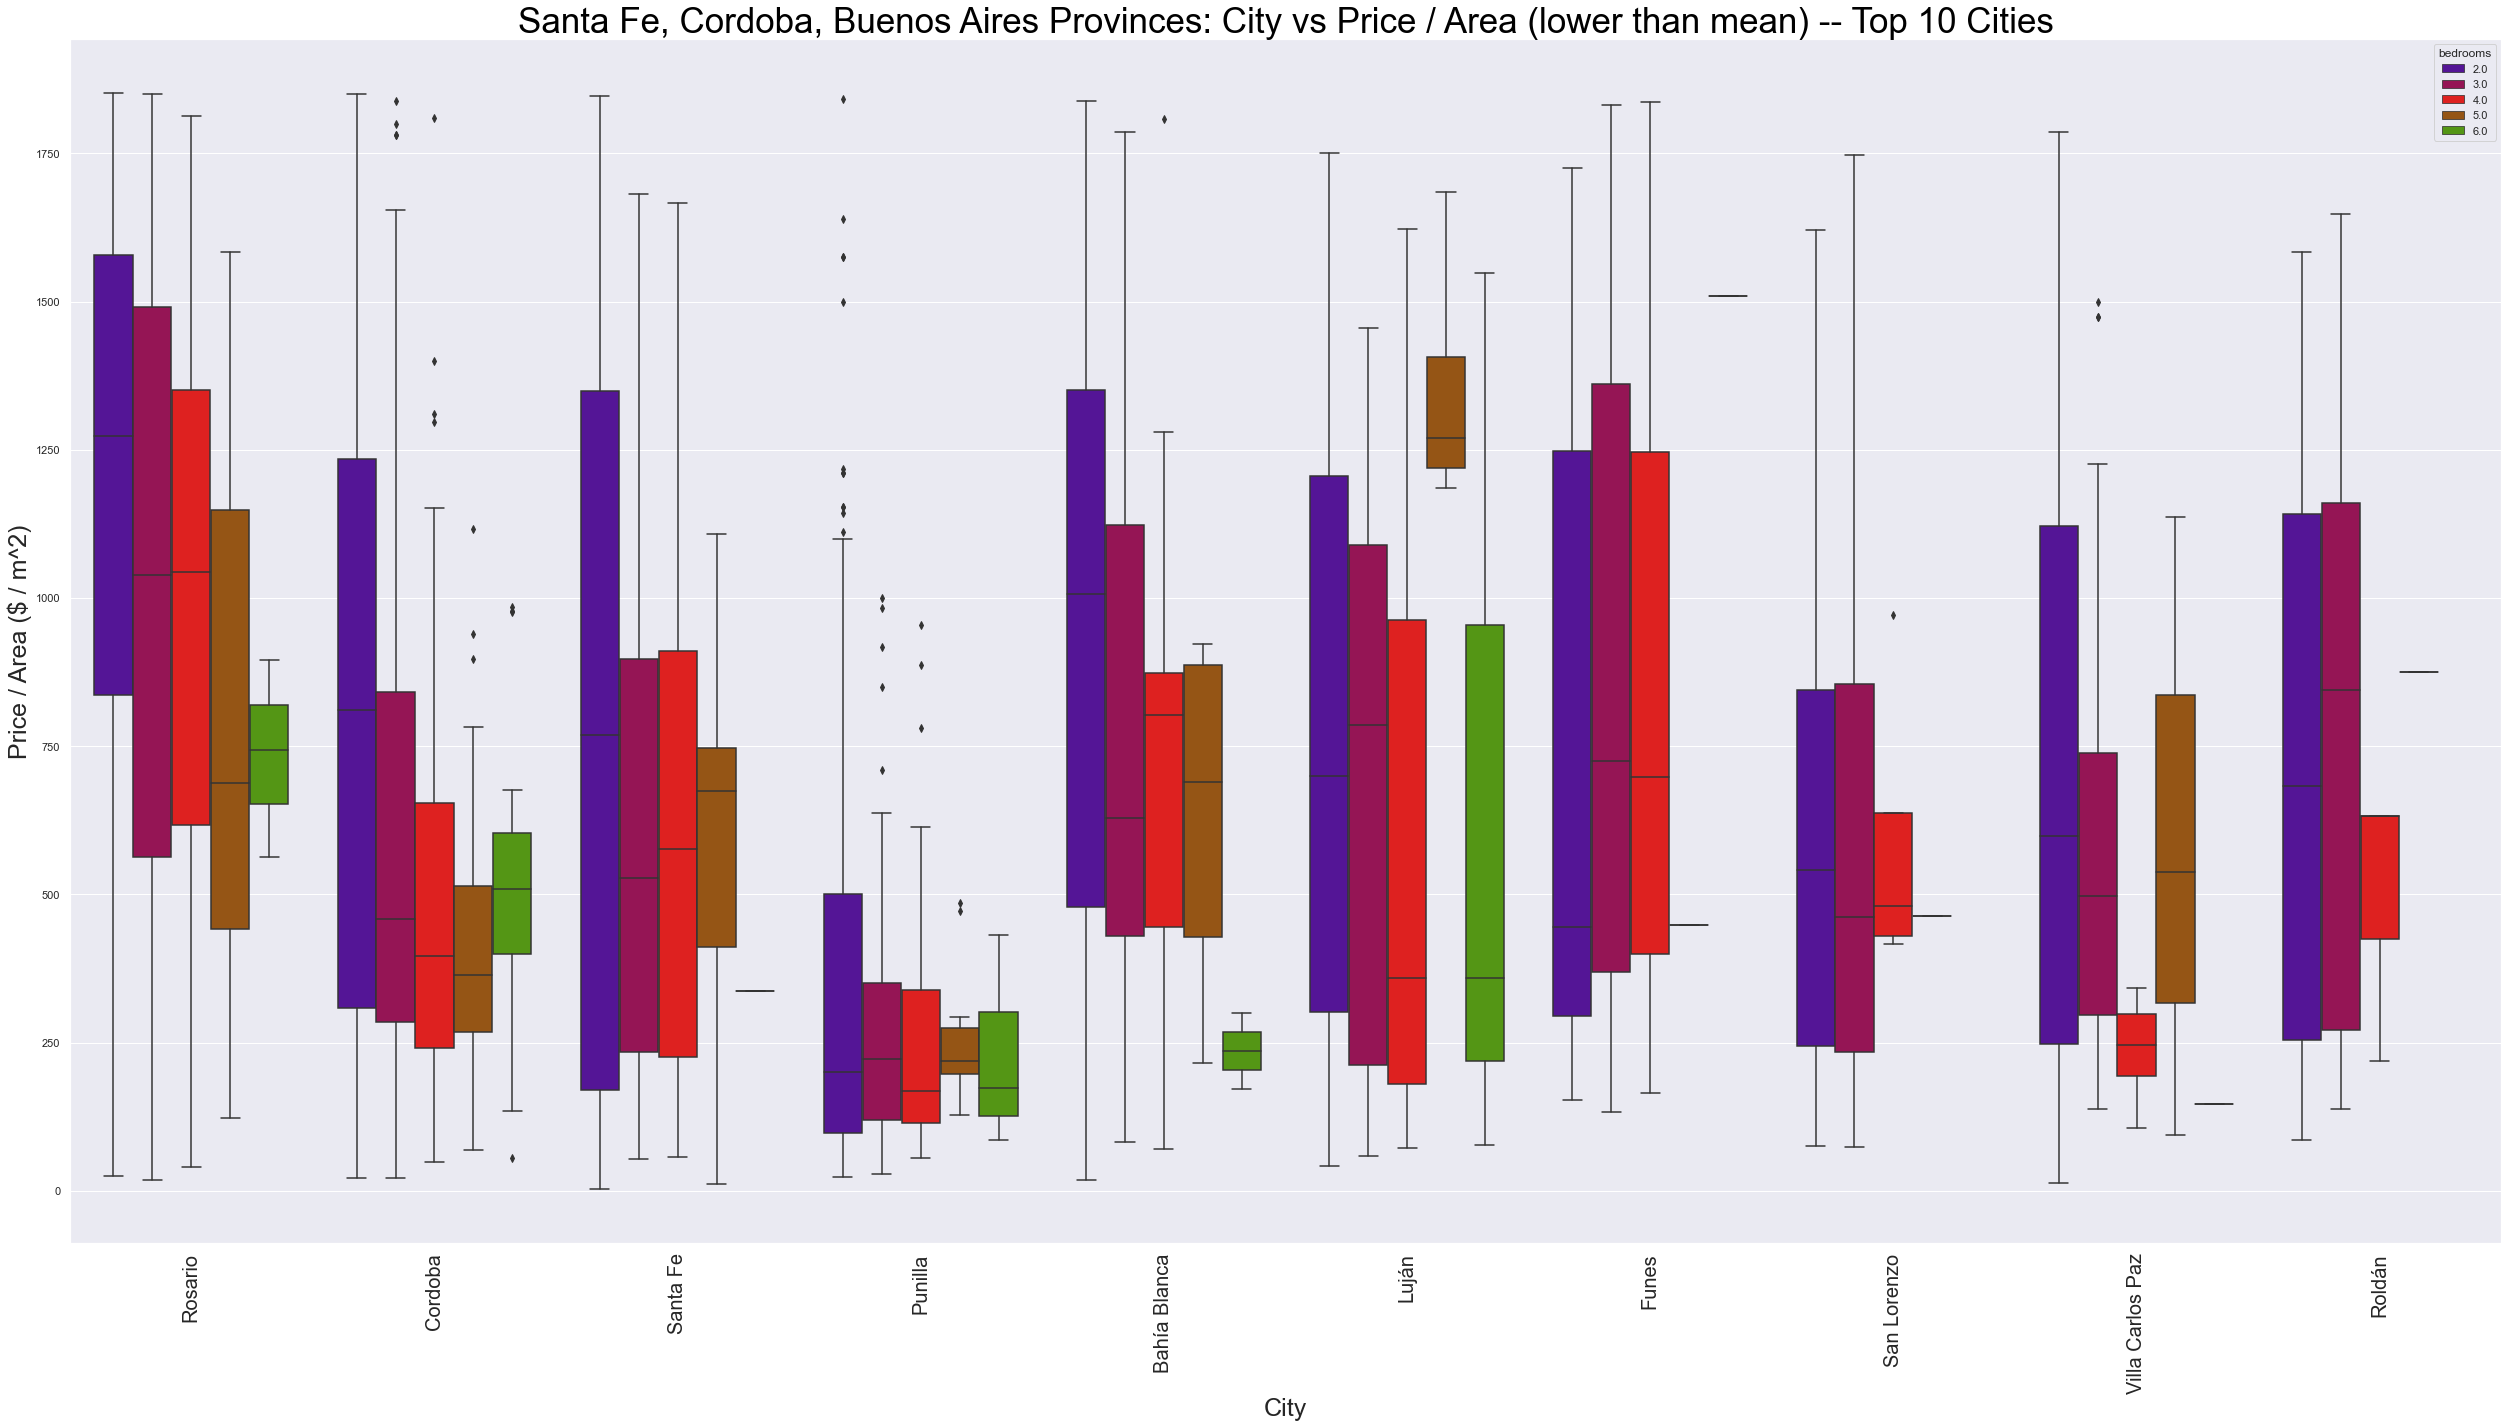

In [41]:
# focus on Cordoba, Buenos Aires Interior, Santa Fe provinces, using only 2+ bedroom properties
df_low_price = df_prov_3['price_area'] < two_plus_bed_mean_price_area
df6 = df_prov_3[df_low_price]

fig, ax = plt.subplots(figsize = (35,20))
sns.boxplot(x = df6['City'], y = df6['price_area'], hue = df6['bedrooms'],  palette="brg", order = df6['City'].value_counts().iloc[:10].index)

plt.xlabel('City', fontsize = 25)
plt.ylabel('Price / Area ($ / m^2)', fontsize = 25)

#from matplotlib.ticker import FuncFormatter    #  control the y-axis numbering
#f = lambda y, pos: f'{y/10**3:,.0f}K'  # thousands
#f = lambda y, pos: f'{y/10**6:,.0f}M'   # millions
#ax.yaxis.set_major_formatter(FuncFormatter(f))

plt.xticks(rotation = 90, fontsize = 20)
plt.title('Santa Fe, Cordoba, Buenos Aires Provinces: City vs Price / Area (lower than mean) -- Top 10 Cities', color = 'black', fontsize = 35)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------

## Use code below to export CSV file when finalized.

In [42]:
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df5           # specify dataframe to use as output, used df5 as Tableau can filter out what I need later
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df5.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

---

## <span style="color:blue">Inferential Statistical Analysis</span>

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the price against all your independent variables, which include every other variable that is not price.

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:
    ## Add a constant to follow the equation form: Ab + x (X = sm.add_constant(X))
    ## Instantiate the Ordinary Least Squares Model with: model = sm.OLS(Y,X) where Y is the dependent variable and X is the independent variable 
    ## Fit the Model (OLSmodelResult = OLSmodel.fit())
    ## Print the OLSModel Summary 

Link: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html


In [46]:
# focus on Cordoba, Buenos Aires Interior, Santa Fe provinces, using only 2+ bedroom properties

df6 = df6.reset_index(drop = True)     # reset indexing

# Dependent variable
y = df6['price']    

# create column list to create Indepedent variables 
df_indices_filt = ['rooms', 'bedrooms', 'bathrooms', 'surface_total']

X = df6[df_indices_filt]  #Indepedent variables
X = sm.add_constant(X)   # add constant column to dataframe

model = sm.OLS(y,X).fit()  # ordinary least squares regression

model.summary()       # summary of OLS results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1286.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:17:37   Log-Likelihood:                -95448.
No. Observations:                7527   AIC:                         1.909e+05
Df Residuals:                    7522   BIC:                         1.909e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.078e+04   3068.446     -3.513      0.000   -1.68e+04   -4765.606
rooms          -113.6334    569.666     -0.199      0.842   -1230.337    1003.070
bedrooms       1.699e+04   1595.245     10.653      0.000    1.39e+04    2.01e+04
bathrooms      5.599e+04   1366.779     40.967      0.000    5.33e+04    5.87e+04
surface_total    36.4405      1.839     19.817      0.000      32.836      40.045
==============================================================================
Omnibus:                     3082.380   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34609.519
Skew:                           1.646   Prob(JB):                         0.00
Kurtosis:                      12.976   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

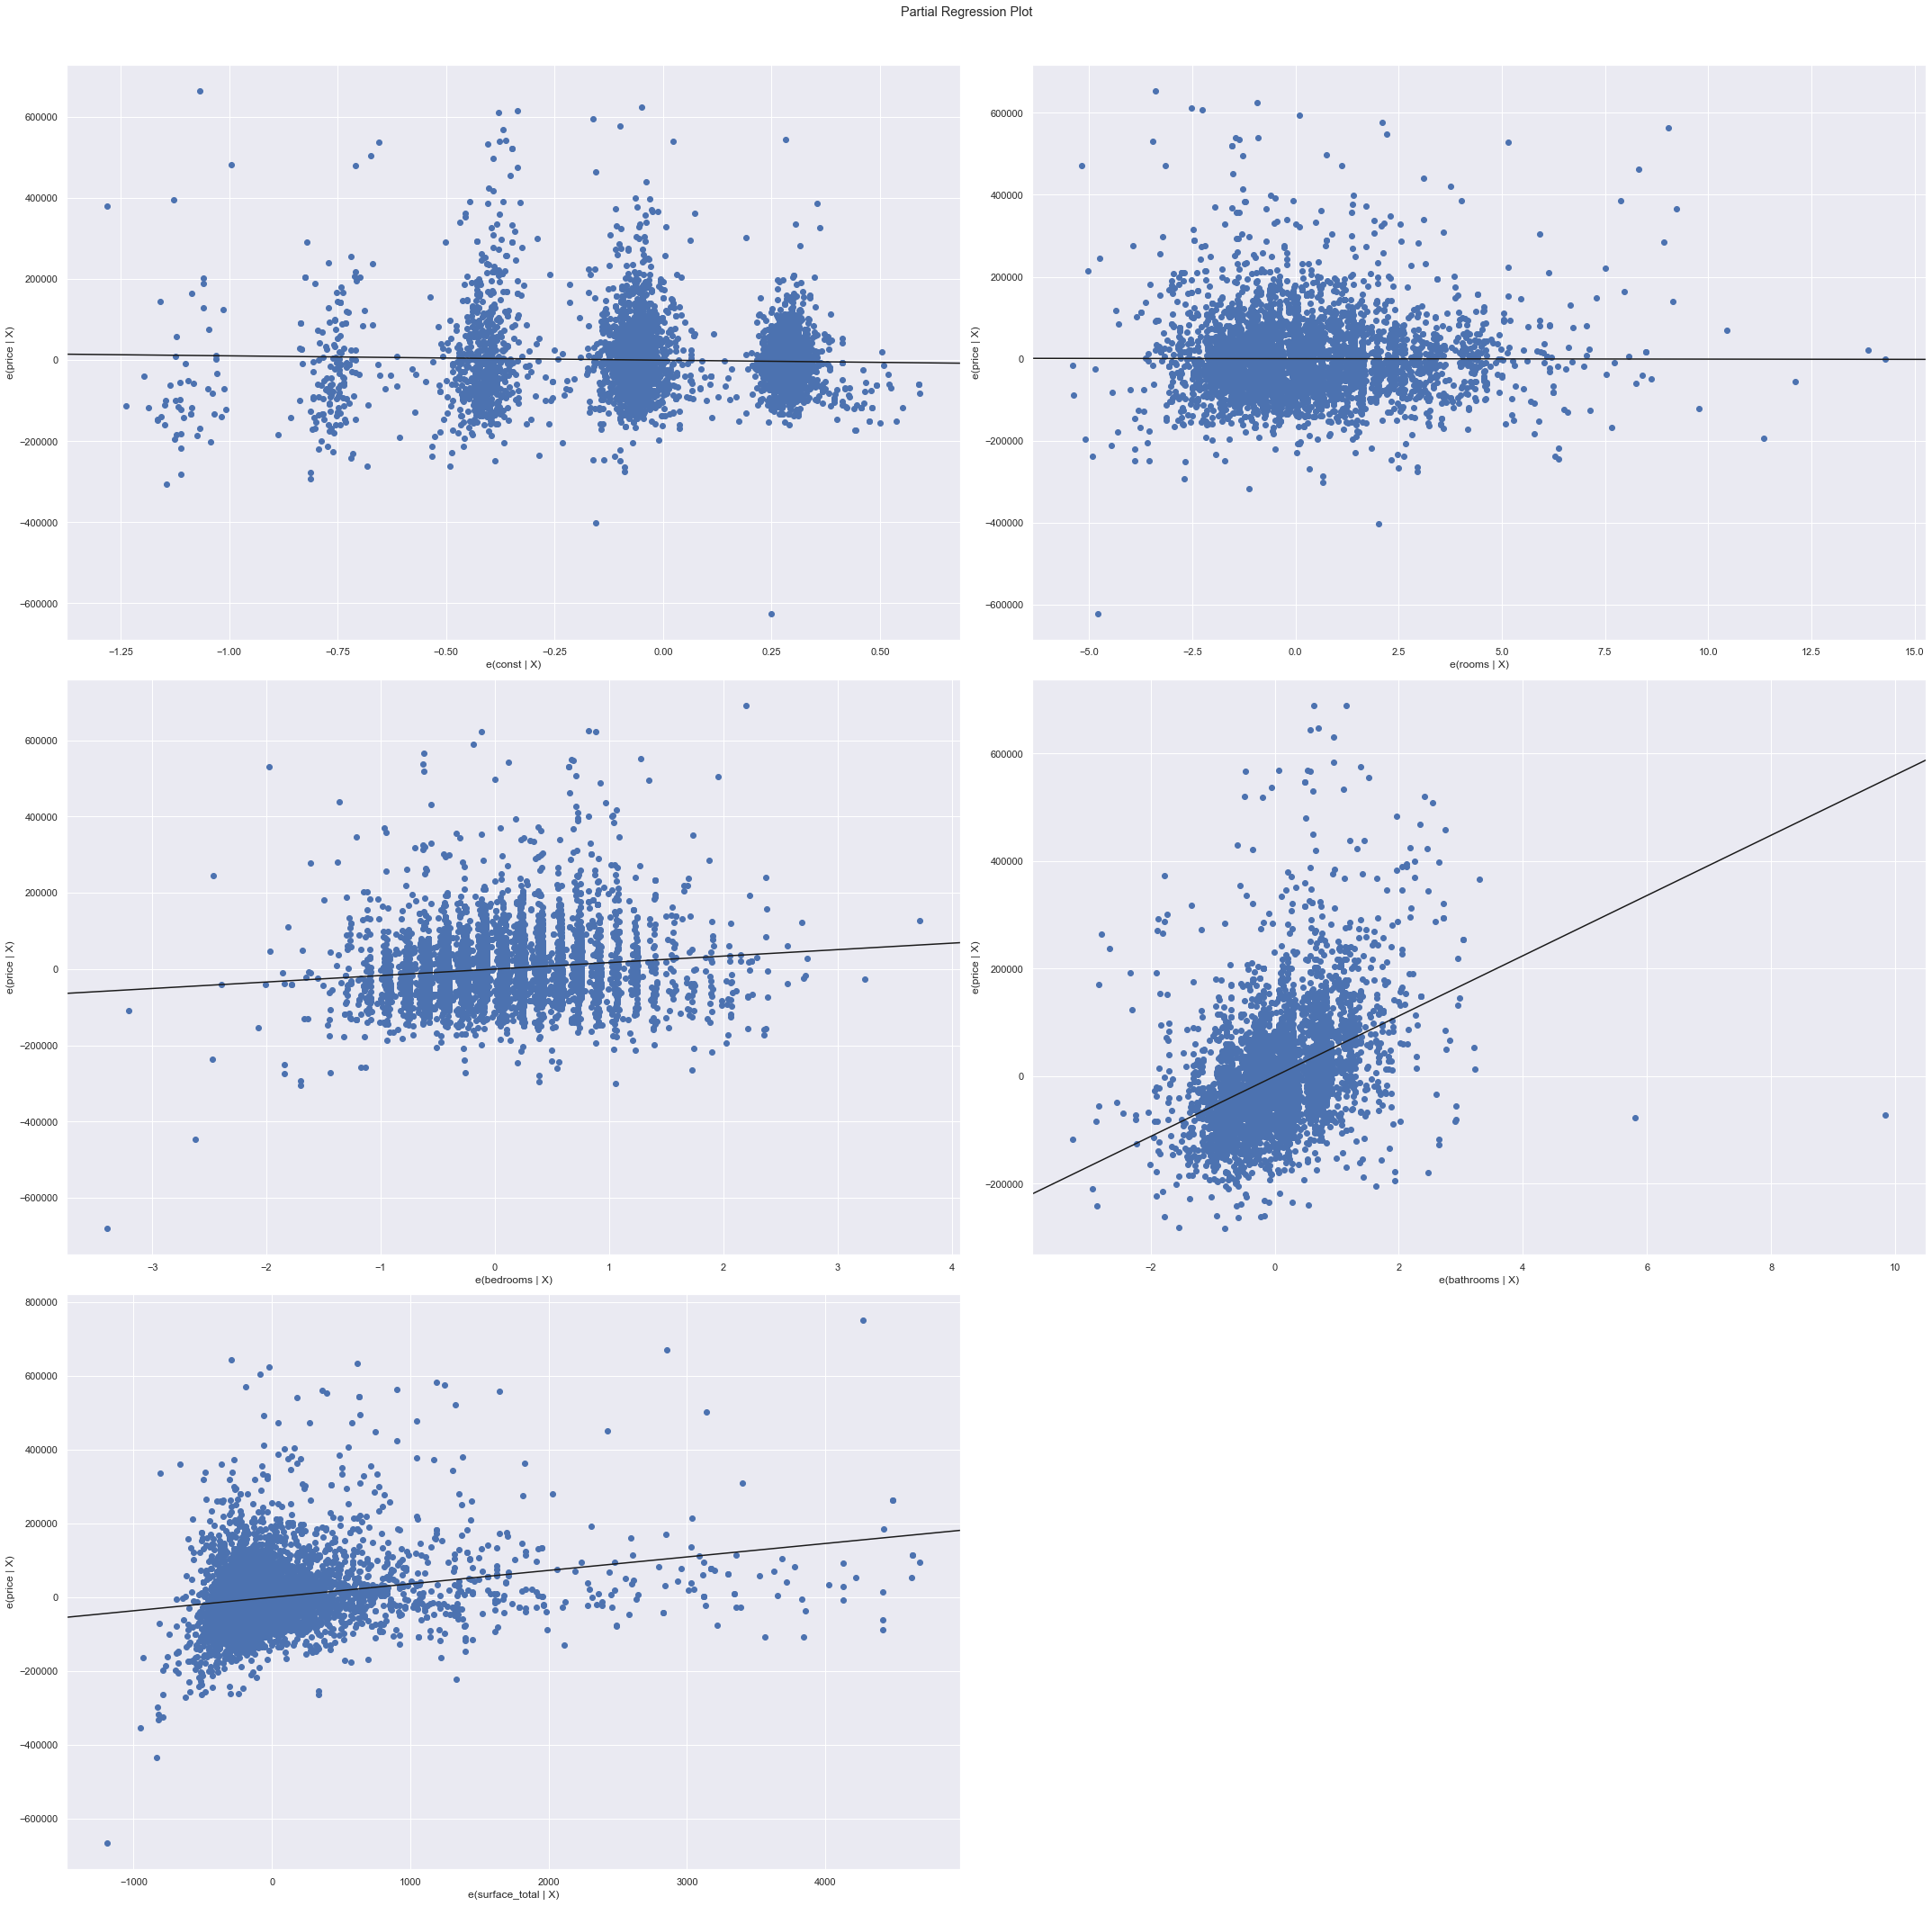

In [47]:
fig = plt.figure(figsize = (30,30))
fig = sm.graphics.plot_partregress_grid(model, fig = fig)